In [1]:
import pandas as pd

import datetime
from datetime import datetime, timedelta
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
sns.set_style("whitegrid")
sns.set(font_scale=2)
sns.set_palette("tab10")

In [2]:
JFK_df=pd.read_csv('/Users/aka/Magnificent Boot Camp/OM/Project/PP_Data/JFK_merged_18_22.csv')
print("Length of DF with origin JFK in 2018 to 2022 ",len(JFK_df))
JFK_df.FL_Date = pd.to_datetime(JFK_df.FL_Date)
print("Length of DF with origin JFK in 2018 to 2022 ",len(JFK_df))
JFK_df.columns

Length of DF with origin JFK in 2018 to 2022  635165
Length of DF with origin JFK in 2018 to 2022  635165


Index(['Unnamed: 0.4', 'Unnamed: 0.1', 'Unnamed: 0', 'DayOfWeek', 'FL_Date',
       'Carrier', 'FL_Num', 'Origin', 'Dest', 'Scheduled_Dep_Time',
       'Actual_Dep_Time', 'DepDelay', 'DepartureDelayGroups', 'TaxiOut',
       'Scheduled_Arr_Time', 'Actual_Arr_Time', 'ArrDelay',
       'ArrivalDelayGroups', 'Cancelled', 'CancellationCode', 'Diverted',
       'Estimated_Elapsed_Time', 'Actual_Elapsed_Time', 'Distance',
       'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay',
       'LateAircraftDelay', 'Unnamed: 0.3', 'Unnamed: 0.2'],
      dtype='object')

In [3]:
print(JFK_df.shape)

(635165, 31)


In [4]:
## Making datetime object and extracting year, month, date, and departure hour

def make_datetime(df,colname):
    df[colname]=pd.to_numeric(df[colname])
    minute=(df[colname]%100).values
    hr=(df[colname]//100).values
    time_col=[]
  
    for i in range(len(minute)):
        
        time_col.append(df.FL_Date.iloc[i] +timedelta(hours=int(hr[i]),minutes=int(minute[i])))
    return time_col

JFK_df=JFK_df[JFK_df['Actual_Dep_Time'].notnull()] # drop cancelled flights
JFK_df=JFK_df[JFK_df['Actual_Arr_Time'].notnull()] # drop cancelled flights

JFK_df['Scheduled_Dep_Time']=make_datetime(JFK_df,'Scheduled_Dep_Time')
JFK_df['Actual_Dep_Time']=make_datetime(JFK_df,'Actual_Dep_Time')
#JFK_df['Actual_Arr_Time']=make_datetime(JFK_df,'Actual_Arr_Time')
#JFK_df['Scheduled_Arr_Time']=make_datetime(JFK_df,'Scheduled_Arr_Time')

JFK_df['Month']=pd.DatetimeIndex(JFK_df['FL_Date']).month
JFK_df['Hour']=pd.DatetimeIndex(JFK_df['Scheduled_Dep_Time']).hour
JFK_df['Day']=pd.DatetimeIndex(JFK_df['Scheduled_Dep_Time']).day
JFK_df['Year']=pd.DatetimeIndex(JFK_df['Scheduled_Dep_Time']).year



In [5]:
## Keeping only the usable features
JFK_df= JFK_df.drop(['Unnamed: 0.4', 'Unnamed: 0.1', 'Unnamed: 0', 'Unnamed: 0.3', 'Unnamed: 0.2'], axis = 1)
JFK_df= JFK_df.drop(['FL_Num', 'DepartureDelayGroups', 'TaxiOut'], axis = 1)
JFK_df= JFK_df.drop(['Scheduled_Arr_Time', 'Actual_Arr_Time', 'ArrDelay', 'ArrivalDelayGroups'], axis = 1)
JFK_df= JFK_df.drop(['Cancelled', 'CancellationCode', 'Diverted', 'Estimated_Elapsed_Time', 'Actual_Elapsed_Time'],
                    axis = 1)
JFK_df.head()

,DayOfWeek,FL_Date,Carrier,Origin,Dest,Scheduled_Dep_Time,Actual_Dep_Time,DepDelay,Distance,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,Month,Hour,Day,Year
0,2,2022-05-31,UA,JFK,SFO,2022-05-31 17:30:00,2022-05-31 17:31:00,1.0,2586.0,NaN,NaN,NaN,NaN,NaN,5,17,31,2022
1,2,2022-05-31,UA,JFK,SFO,2022-05-31 06:30:00,2022-05-31 06:40:00,10.0,2586.0,NaN,NaN,NaN,NaN,NaN,5,6,31,2022
2,2,2022-05-31,UA,JFK,LAX,2022-05-31 18:35:00,2022-05-31 19:00:00,25.0,2475.0,NaN,NaN,NaN,NaN,NaN,5,18,31,2022
3,2,2022-05-31,UA,JFK,LAX,2022-05-31 10:00:00,2022-05-31 09:52:00,-8.0,2475.0,NaN,NaN,NaN,NaN,NaN,5,10,31,2022
5,1,2022-05-30,UA,JFK,SFO,2022-05-30 06:30:00,2022-05-30 06:20:00,-10.0,2586.0,NaN,NaN,NaN,NaN,NaN,5,6,30,2022


In [6]:
JFK_df.shape

(619755, 18)

In [7]:
print(JFK_df.isna().sum())

DayOfWeek                  0
FL_Date                    0
Carrier                    0
Origin                     0
Dest                       0
Scheduled_Dep_Time         0
Actual_Dep_Time            0
DepDelay                 131
Distance                   0
CarrierDelay          501051
WeatherDelay          501051
NASDelay              501051
SecurityDelay         501051
LateAircraftDelay     501051
Month                      0
Hour                       0
Day                        0
Year                       0
dtype: int64


# Problem Statement: 

**Given a 4-hour period horizon and the scheduled flight data together with the weather data, will a flight be delayed by more than 15 minutes?**

## Delayed flights

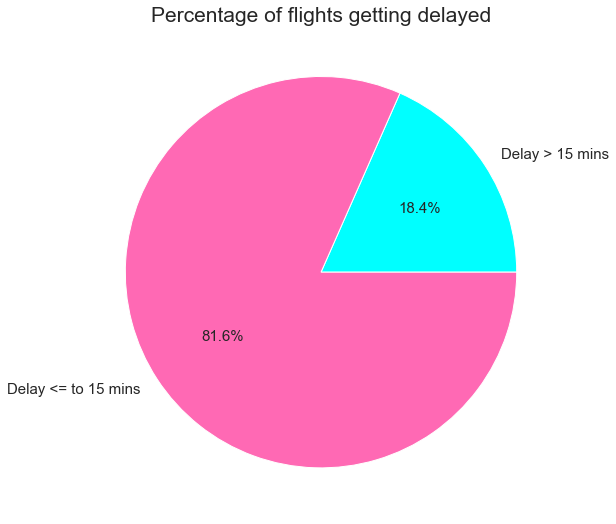

In [8]:
del_flight15=[JFK_df[(JFK_df['DepDelay']>15)].DepDelay.count()/len(JFK_df)*100, 
         JFK_df[(JFK_df['DepDelay']<=15)].DepDelay.count()/len(JFK_df)*100]

plt.figure(figsize = (18,9))
plt.pie(np.array(del_flight15), labels =['Delay > 15 mins', 'Delay <= to 15 mins'], autopct='%1.1f%%', 
        colors = ['cyan', 'hotpink'], textprops={'fontsize': 15})
#plt.legend(fontsize = 15, 
#           bbox_to_anchor = (1,0,0,1))
plt.title('Percentage of flights getting delayed', fontsize = 21)
plt.savefig('imbalance.png', dpi = 300, bbox_inches='tight')
plt.show()


- This shows that there exists an imbalance in the dataset. Note that most of the flights fall under the not delayed category, i.e., $\leq 15$ minutes. To counter this challenge, we plan to oversample the minority class while training instead of giving minority class more weightage to solve the class imbalance problem. Giving more weightage to minority class yield poor results.


## Flight Carrier Analysis

<Figure size 648x1728 with 0 Axes>

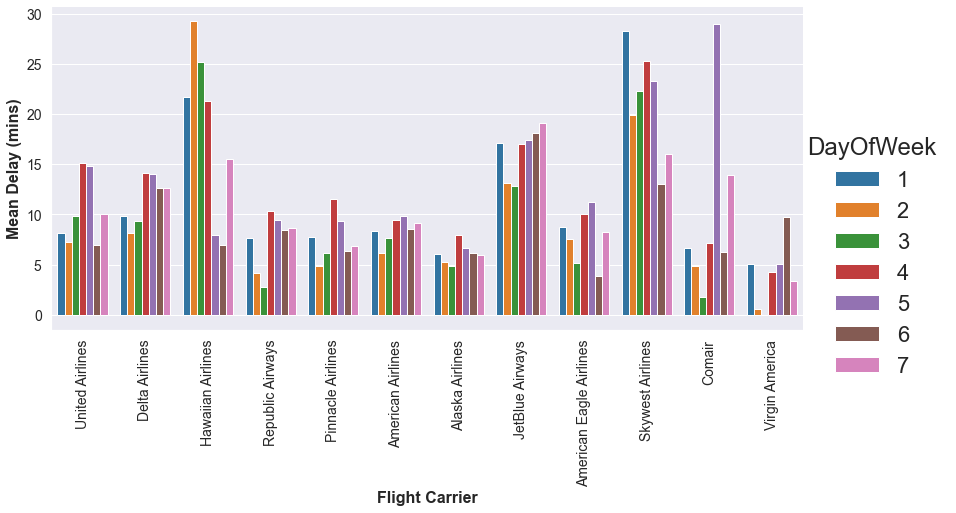

In [9]:
plt.figure(figsize=(9, 24))
sns.set(font_scale=2)
sns.set_palette("tab10")
fca = sns.catplot(data=JFK_df,x="Carrier", y="DepDelay", hue='DayOfWeek',ci=None,
            estimator=np.mean, kind='bar', alpha=1, height=6,aspect=2)
plt.xlabel('Flight Carrier', fontsize=16,weight="bold");
plt.ylabel('Mean Delay (mins)', fontsize=16,weight="bold");
plt.tick_params(axis='both', which='major', labelsize=14)
fca.set_xticklabels(['United Airlines', 'Delta Airlines', 'Hawaiian Airlines', 'Republic Airways',
                     'Pinnacle Airlines', 'American Airlines', 'Alaska Airlines', 'JetBlue Airways',
                    'American Eagle Airlines', 'Skywest Airlines', 'Comair', 'Virgin America'],
                   rotation = 'vertical')
plt.show()

- There are 12 different airline from JFK airport flying to 80 destinations (see below).
- The airlines with the longest mean length of delay (in minutes) over the entire dataset are identified to be `Skywest Airlines`, `Hawaiian Airlines` and `JetBlue Airways`. On the other side, `Virgin America` and `Alaska Airlines` have the shortest mean length of delay. 
- To analyze this further, we next plot the total number of delayed flights for each airline where the delay is more than 15 minutes.

In [10]:
#print(['YX: Republic Airways',   'DL: Delta Airlines', 'B6: JetBlue Airways', 'AS: Alaska Airlines',
#       'HA: Hawaiian Airlines', '9E: Pinnacle Airlines', 'AA: American Airlines', 'UA: United Airlines',
#      'MQ: American Eagle Airlines', 'OO: Skywest Airlines', 'OH: Comair', 'VX: Virgin America'])

<Figure size 648x1728 with 0 Axes>

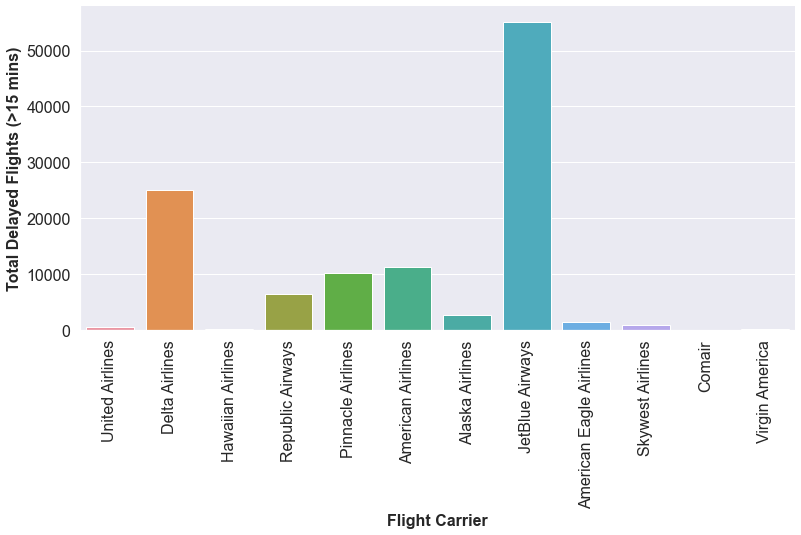

In [11]:
plt.figure(figsize=(9, 24))

df=JFK_df[JFK_df.DepDelay>15]
fca2 = sns.catplot(data=df,x="Carrier",  ci=None,
             kind='count', alpha=1, height=6,aspect=2)
plt.xlabel('Flight Carrier', fontsize=16,weight="bold");
plt.ylabel('Total Delayed Flights (>15 mins)', fontsize=16,weight="bold");
plt.tick_params(axis='both', which='major', labelsize=16)
fca2.set_xticklabels(['United Airlines', 'Delta Airlines', 'Hawaiian Airlines', 'Republic Airways',
                     'Pinnacle Airlines', 'American Airlines', 'Alaska Airlines', 'JetBlue Airways',
                    'American Eagle Airlines', 'Skywest Airlines', 'Comair', 'Virgin America'],
                   rotation = 'vertical')
plt.savefig('car1.png', dpi = 300, bbox_inches='tight')
plt.show()

- Interstingly, this shows that `Jetblue airways` and `Delta Airlines` have the maximum number of delayed flights in the category (delay $> 15$ minutes) we are interested in.
- Different carriers have different number of total flights. So one can assume that more the number of flights, more would be the delay. However, percentage of flights delayed for different carriers are different. Therefore, we would take into account the probability of the delay given a certain carrier, i.e., P(delay|carrier_i).

## Destination Airport Analysis

In [12]:
len(pd.unique(JFK_df['Dest']))

80

In [13]:
df=JFK_df[JFK_df['DepDelay']>15]
Delay=df[["DepDelay","Dest"]].groupby("Dest").count()
df=JFK_df.copy()
Total_flight_Count=df[["DepDelay","Dest"]].groupby("Dest").count()
dest_list = Delay.index.to_list()


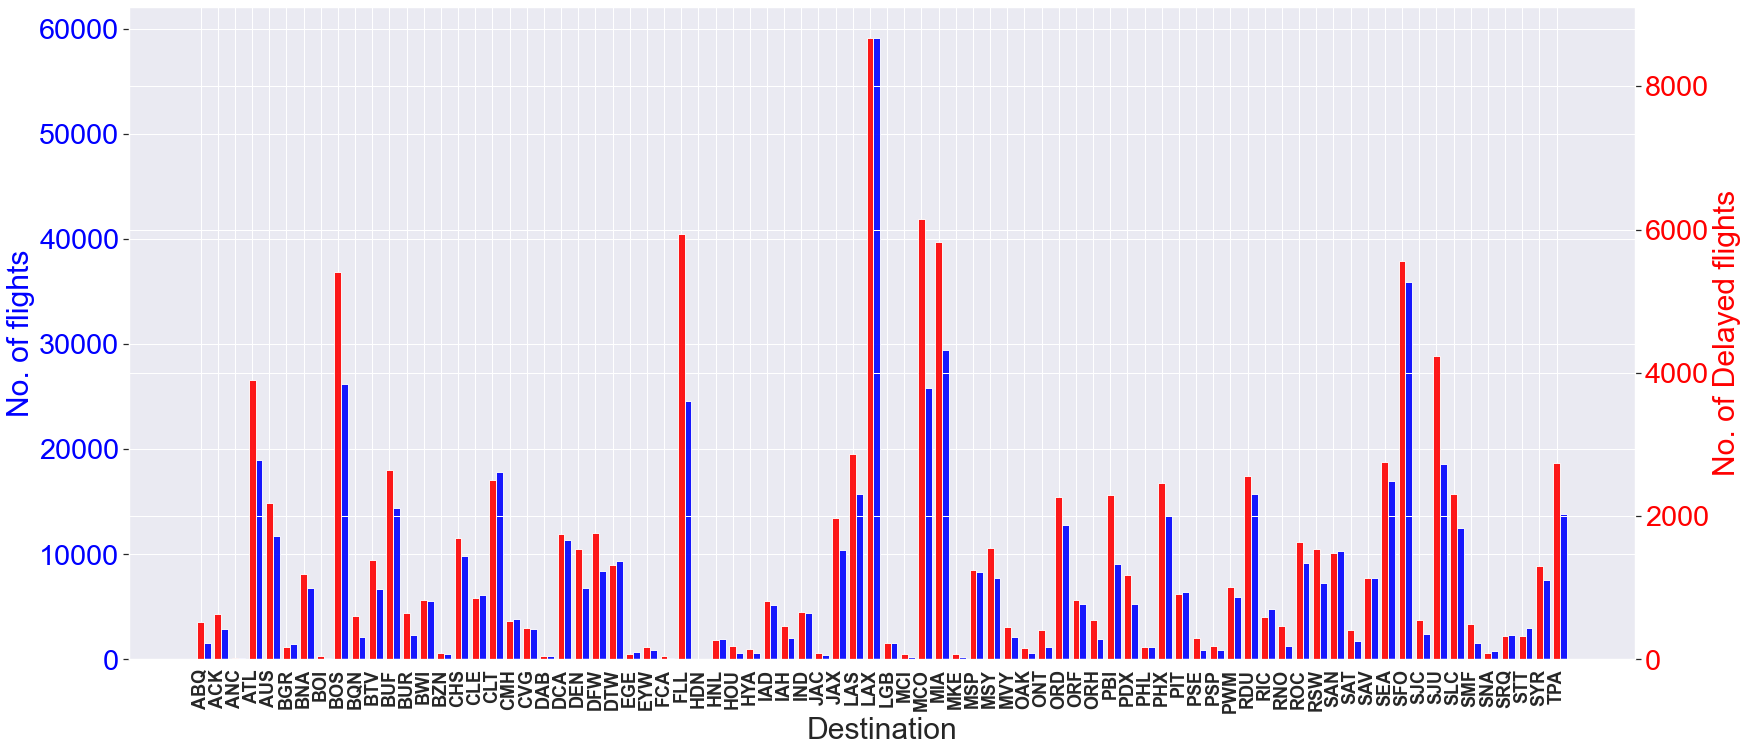

In [14]:
fig, ax1 = plt.subplots(figsize=(27,12))
ax2 = plt.twinx()
x=np.arange(len(Delay.index))
ax2.bar(x,Delay.DepDelay,width=0.4,alpha=0.9,color='red')
ax1.bar(x+.4,Total_flight_Count.DepDelay,width=0.4,alpha=0.9,color='blue')

ax1.set_xticks(range(0,80))
ax1.set_xticklabels(dest_list, fontsize = 18, weight = 'bold',rotation = 90)
ax1.set_xlabel('Destination', fontsize = 30)
ax1.set_ylabel('No. of flights', color='blue', fontsize = 30)
ax1.tick_params(axis='y', labelcolor='blue', labelsize = 'large')
ax2.set_ylabel('No. of Delayed flights', color='red', fontsize = 30)
ax2.tick_params(axis='y', labelcolor='red', labelsize = 'large')
plt.savefig('dest1.png', dpi = 300, bbox_inches='tight')
plt.show()

- We see that JFK airport connects to 80 different destinations. Out of which 
    The top destinations with high number of inbound flights from JFK are:
        - LAX, SFO, MIA, BOS, and FLL
    The top destinations in the number of delayed flights are:
        - LAX, MCO, FLL, MIA, and SFO

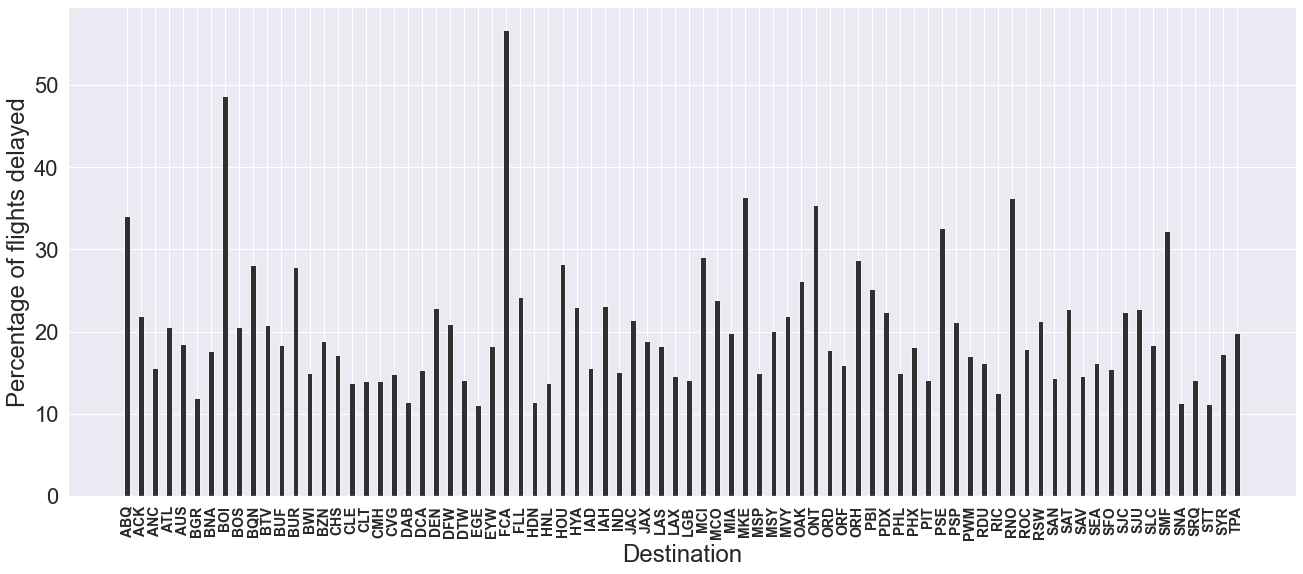

In [15]:
plt.figure(figsize=(22,9))
x=np.arange(len(Delay.index))
plt.bar(x,Delay.DepDelay/Total_flight_Count.DepDelay*100,width=0.4,alpha=0.9,color='k')
plt.xlabel("Destination")
plt.xticks(rotation=90, ha='center',size=14,fontweight='bold')
plt.xticks(x,Delay.index)
plt.ylabel("Percentage of flights delayed")
plt.savefig('dest2.png', dpi = 300, bbox_inches='tight')
plt.show()

With the same reasoning as before (as also noted from the above plot)
- The percentage of flights delayed for different destinations are different, since one can assume trivially that more the number of flights, more would be the delay. Therefore, we would again take into account the probability of the delay given a particular destination.
    - calculated by averaging over all the years for each month. Month wise seggrigation helps to take into account if there is favourate tourist destination for a particular month attracting more traffic or if that destination has weather problems in some months

## Departure Hour

In [16]:
df=JFK_df[JFK_df['DepDelay']>15]
Delay=df[["DepDelay","Hour"]].groupby("Hour").count()
df=JFK_df.copy()
Total_flight_Count=df[["DepDelay","Hour"]].groupby("Hour").count()

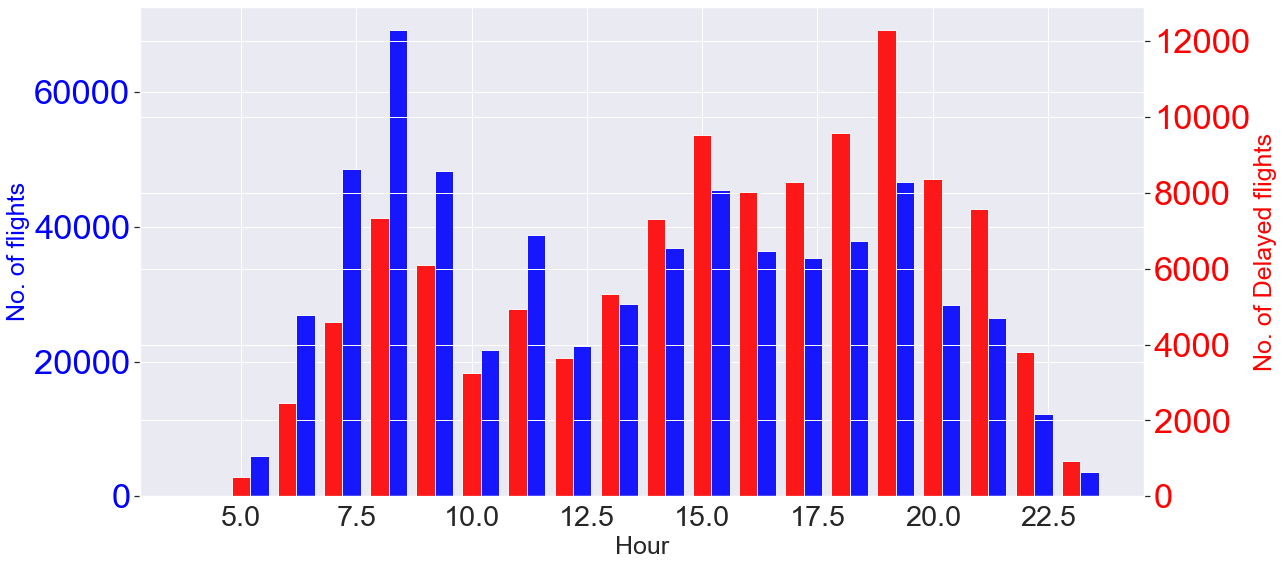

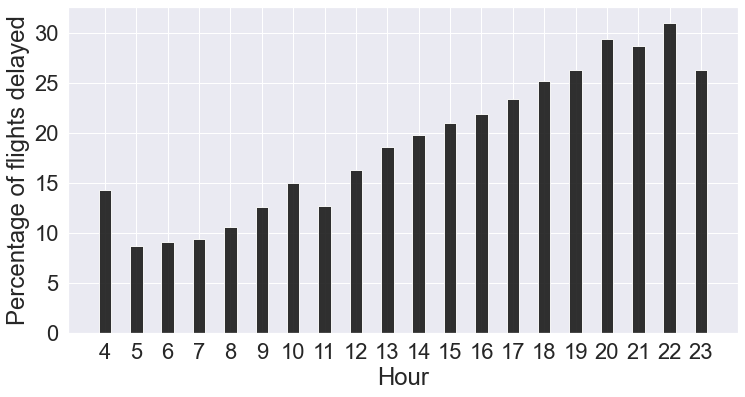

In [17]:
fig, ax1 = plt.subplots(figsize=(18,9))
ax2 = plt.twinx()
x=np.arange(len(Delay.index))+4
ax2.bar(x,Delay.DepDelay,width=0.4,alpha=0.9,color='red', label = '# Delayed flights')
ax1.bar(x+.4,Total_flight_Count.DepDelay,width=0.4,alpha=0.9,color='blue', label='# Total flights')
ax1.tick_params(axis='x', labelsize = 'large')
ax1.set_xlabel('Hour', fontsize = 25)
ax1.set_ylabel('No. of flights', color='blue', fontsize = 25)
ax1.tick_params(axis='y', labelcolor='blue', labelsize = 'x-large')
ax2.set_ylabel('No. of Delayed flights', color='red', fontsize = 25)
ax2.tick_params(axis='y', labelcolor='red', labelsize = 'x-large')
plt.savefig('hour1.png', dpi = 300, bbox_inches='tight')
plt.show()

plt.figure(figsize=(12,6))
x=np.arange(len(Delay.index))
plt.bar(x,Delay.DepDelay/Total_flight_Count.DepDelay*100,width=0.4,alpha=0.9,color='k')
plt.ylabel("Percentage of flights delayed")
plt.xlabel("Hour")
plt.xticks(x,Delay.index)
plt.savefig('hour2.png', dpi = 300, bbox_inches='tight')
plt.show()


- There is an almost steady increase in the proportion of delayed flights throughout the day. The peak is at the departure hour 22:00 (20:00 to 22:00). The increasing trend could be the result of cummulative effect of earlier delays in the day. Moreover, the less number of employees working at night could also be adding to the delays.

In [18]:
#Total_flight_Count['Delayed_flights'] = Delay['DepDelay']
#Total_flight_Count.reset_index(drop = False, inplace = True)
#Total_flight_Count

In [19]:
#import plotly.express as px


#fig = px.scatter(Total_flight_Count, x ='DepDelay', y = 'Delayed_flights', color = 'Hour',
#                labels = {'DepDelay': '# of total flights', 'Delayed_flights': '# of delayed flights'},
#                width=950, height=600)
#fig.update_layout(font=dict(size=18,  color="Black"))
#fig.show()

## Monthly Analysis

In [20]:
df=JFK_df[JFK_df['DepDelay']>15]
Delay=df[["DepDelay","Month"]].groupby("Month").count()
df=JFK_df.copy()
Total_flight_Count=df[["DepDelay","Month"]].groupby("Month").count()

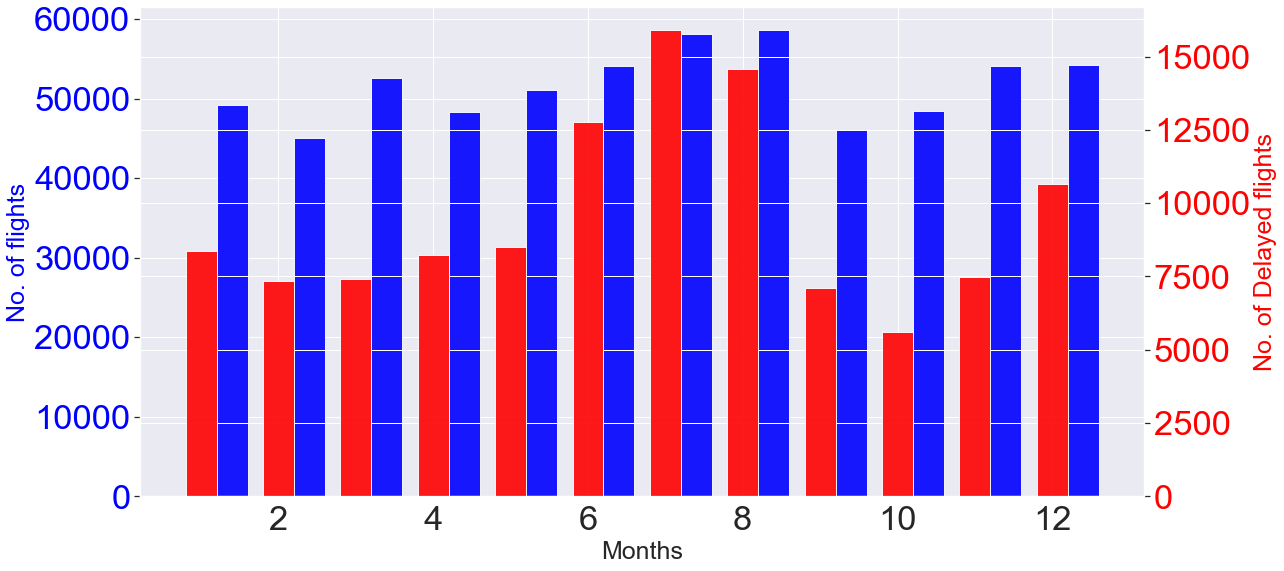

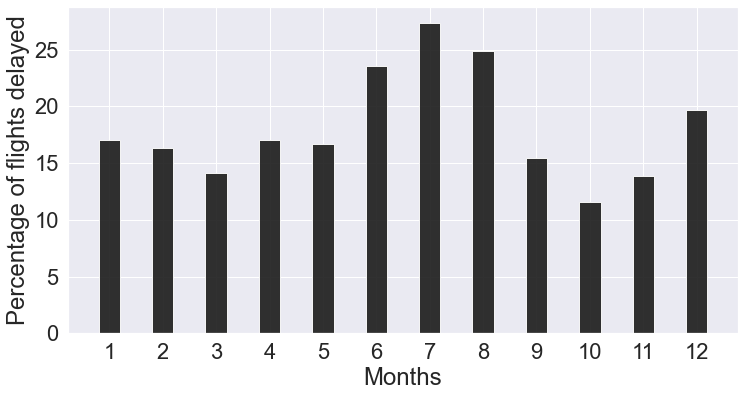

In [21]:
fig, ax1 = plt.subplots(figsize=(18,9))
ax2 = plt.twinx()
x=np.arange(len(Delay.index))+1
ax2.bar(x,Delay.DepDelay,width=0.4,alpha=0.9,color='red', label = '# Delayed flights')
ax1.bar(x+.4,Total_flight_Count.DepDelay,width=0.4,alpha=0.9,color='blue', label='# Total flights')
ax1.tick_params(axis='x', labelsize = 'x-large')
ax1.set_xlabel('Months', fontsize = 25)
ax1.set_ylabel('No. of flights', color='blue', fontsize = 25)
ax1.tick_params(axis='y', labelcolor='blue', labelsize = 'x-large')
ax2.set_ylabel('No. of Delayed flights', color='red', fontsize = 25)
ax2.tick_params(axis='y', labelcolor='red', labelsize = 'x-large')
plt.savefig('mon1.png', dpi = 300, bbox_inches='tight')
plt.show()

plt.figure(figsize=(12,6))
x=np.arange(len(Delay.index))
plt.bar(x,Delay.DepDelay/Total_flight_Count.DepDelay*100,width=0.4,alpha=0.9,color='k')
plt.ylabel("Percentage of flights delayed")
plt.xlabel("Months")
plt.xticks(x,Delay.index)
plt.savefig('mon2.png', dpi = 300, bbox_inches='tight')
plt.show()


-  The highest Proportion of flights delayed are in the month of June, July (peak) and August, i.e., summer months. Followed by December (Christmas). The best month to travel is October, followed by March, November.

## Reason of Delay

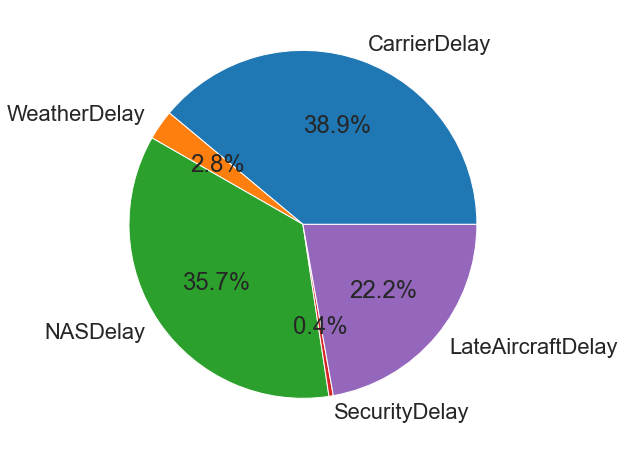

In [22]:
df=JFK_df.copy()
heights=[df[(df['CarrierDelay']>0)].CarrierDelay.count()/len(df[df.DepDelay>0])*100, 
         df[(df['WeatherDelay']>0)].WeatherDelay.count()/len(df[df.DepDelay>0])*100,
        df[(df['NASDelay']>0)].NASDelay.count()/len(df[df.DepDelay>0])*100,
        df[(df['SecurityDelay']>0)].SecurityDelay.count()/len(df[df.DepDelay>0])*100,
        df[(df['LateAircraftDelay']>0)].LateAircraftDelay.count()/len(df[df.DepDelay>0])*100 ]

plt.figure(figsize=(10,8))
plt.pie(np.array(heights),labels =['CarrierDelay', 'WeatherDelay', 'NASDelay','SecurityDelay', 'LateAircraftDelay'],
       autopct='%1.1f%%',)
plt.show()

In [23]:
# It seems like some delayes are marked as both as NASDELAYS and someother thing

## Day of Week

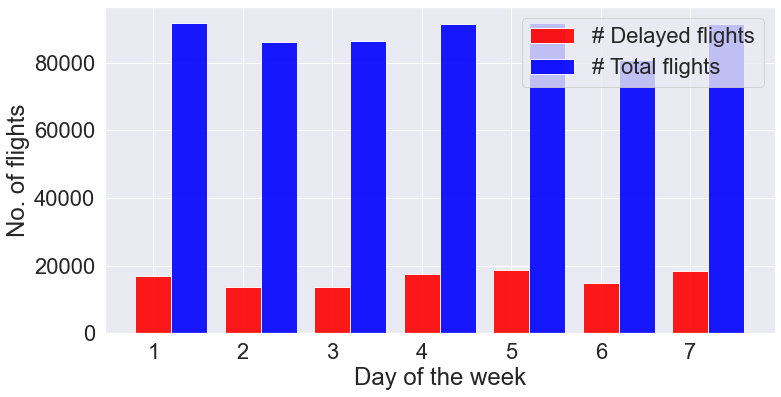

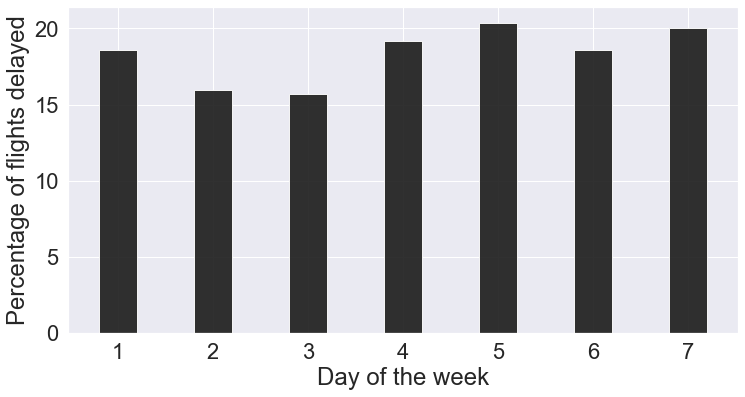

In [24]:
df=JFK_df[JFK_df['DepDelay']>15]
Delay=df[["DepDelay","DayOfWeek"]].groupby("DayOfWeek").count()
df=JFK_df.copy()
Total_flight_Count=df[["DepDelay","DayOfWeek"]].groupby("DayOfWeek").count()


plt.figure(figsize=(12,6))
x=np.arange(len(Delay.index))
plt.bar(x,Delay.DepDelay,width=0.4,alpha=0.9,color='red')# color=['red', 'blue', 'magenta', 'green', 'pink'])
plt.bar(x+.4,Total_flight_Count.DepDelay,width=0.4,alpha=0.9,color='blue')
plt.xticks(x,Delay.index)
plt.ylabel("No. of flights")
plt.xlabel("Day of the week")
plt.legend(['# Delayed flights', 
            '# Total flights'])
plt.show()


plt.figure(figsize=(12,6))
x=np.arange(len(Delay.index))
plt.bar(x,Delay.DepDelay/Total_flight_Count.DepDelay*100,width=0.4,alpha=0.9,color='k')# color=['red', 'blue', 'magenta', 'green', 'pink'])
plt.ylabel("Percentage of flights delayed")
plt.xlabel("Day of the week")
plt.xticks(x,Delay.index)
plt.show()

- Nothing interesting comes up here, fairly even distribution!

## Distance ???

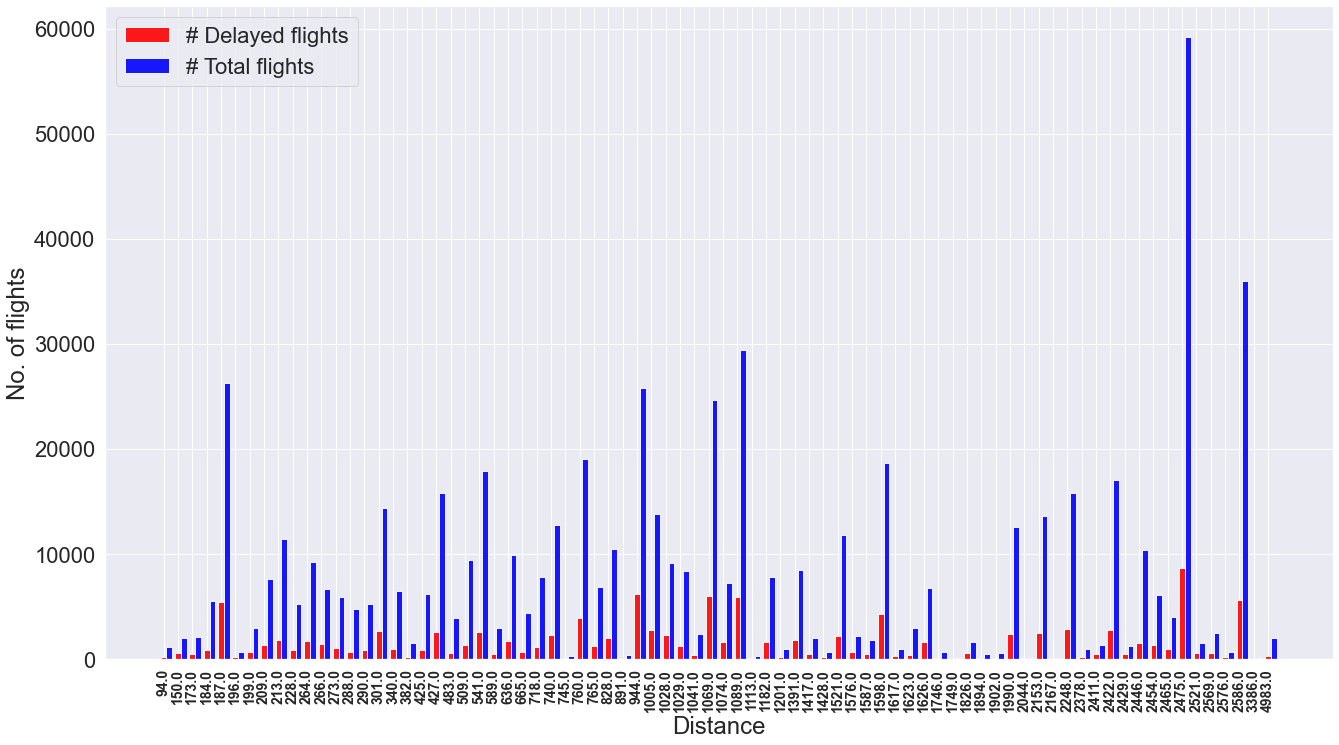

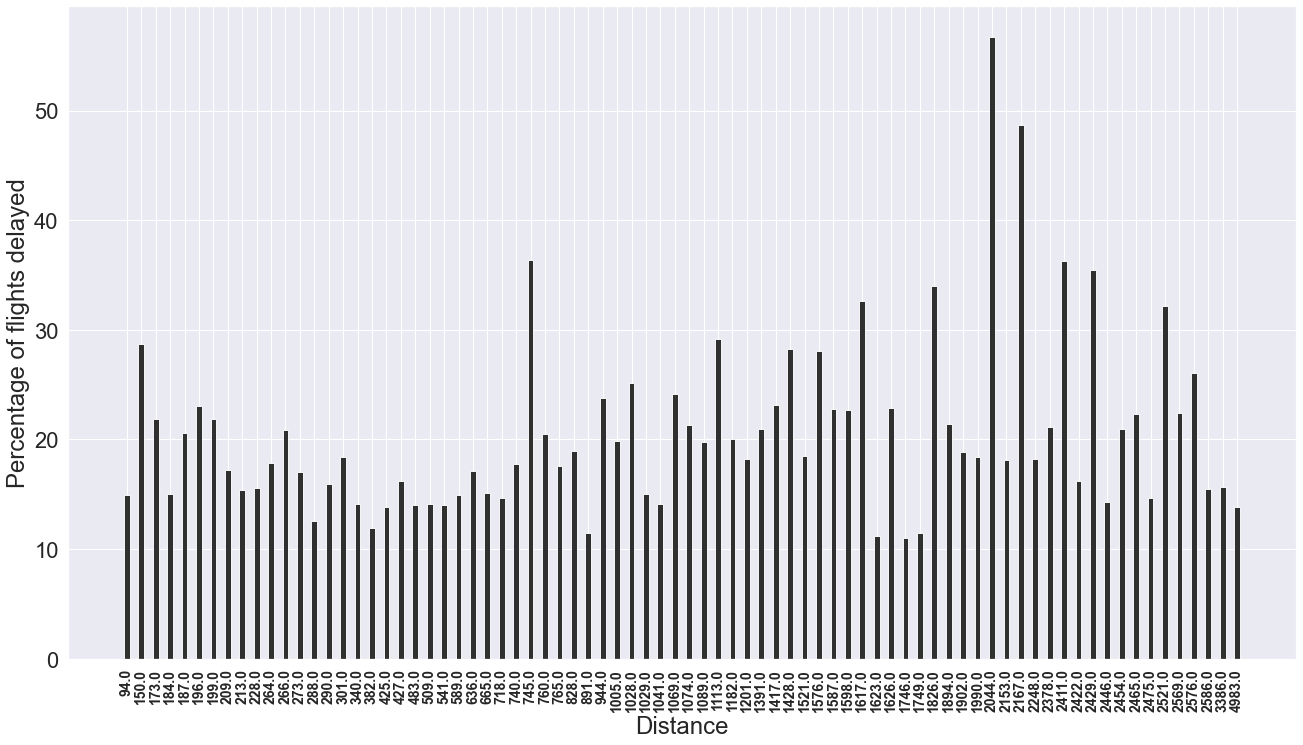

In [25]:
df=JFK_df[JFK_df['DepDelay']>15]
Delay=df[["DepDelay","Distance"]].groupby("Distance").count()
df=JFK_df.copy()
Total_flight_Count=df[["DepDelay","Distance"]].groupby("Distance").count()


plt.figure(figsize=(22,12))
x=np.arange(len(Delay.index))
plt.bar(x,Delay.DepDelay,width=0.4,alpha=0.9,color='red')# color=['red', 'blue', 'magenta', 'green', 'pink'])
plt.bar(x+.4,Total_flight_Count.DepDelay,width=0.4,alpha=0.9,color='blue')
plt.xticks(x,Delay.index)
plt.ylabel("No. of flights")
plt.xlabel("Distance")
plt.legend(['# Delayed flights', 
            '# Total flights'])
plt.xticks(rotation=90, ha='center',size=14,fontweight='bold')
plt.show()


plt.figure(figsize=(22,12))
x=np.arange(len(Delay.index))
plt.bar(x,Delay.DepDelay/Total_flight_Count.DepDelay*100,width=0.4,alpha=0.9,color='k')# color=['red', 'blue', 'magenta', 'green', 'pink'])
plt.ylabel("Percentage of flights delayed")
plt.xlabel("Distance")
plt.xticks(rotation=90, ha='center',size=14,fontweight='bold')
plt.xticks(x,Delay.index)
plt.show()



## Rolling Average analysis

- This will tell us whether the delays have spatial coorelation, in particular, we want to know whether the delay happens in the clusters with one dimension taken to be departure hours and another dimension as the date.


In [26]:
JFK_df_sort=JFK_df.sort_values(by=['Actual_Dep_Time'])

JFK_df_sort= JFK_df_sort.set_index('Actual_Dep_Time')
print(len(JFK_df),len(JFK_df_sort))

619755 619755


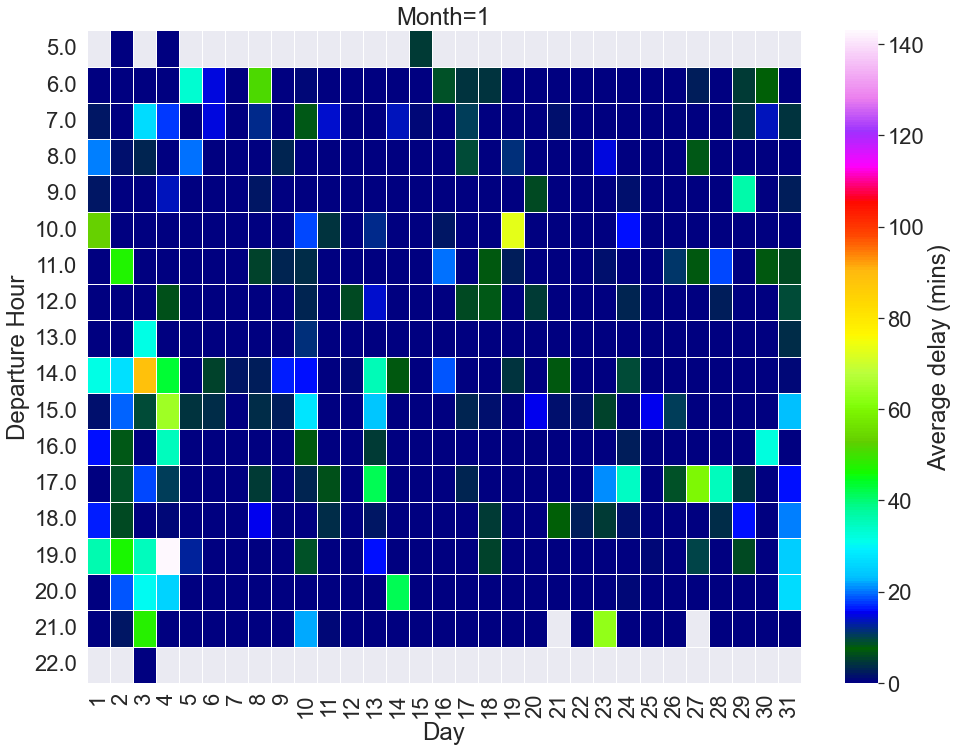

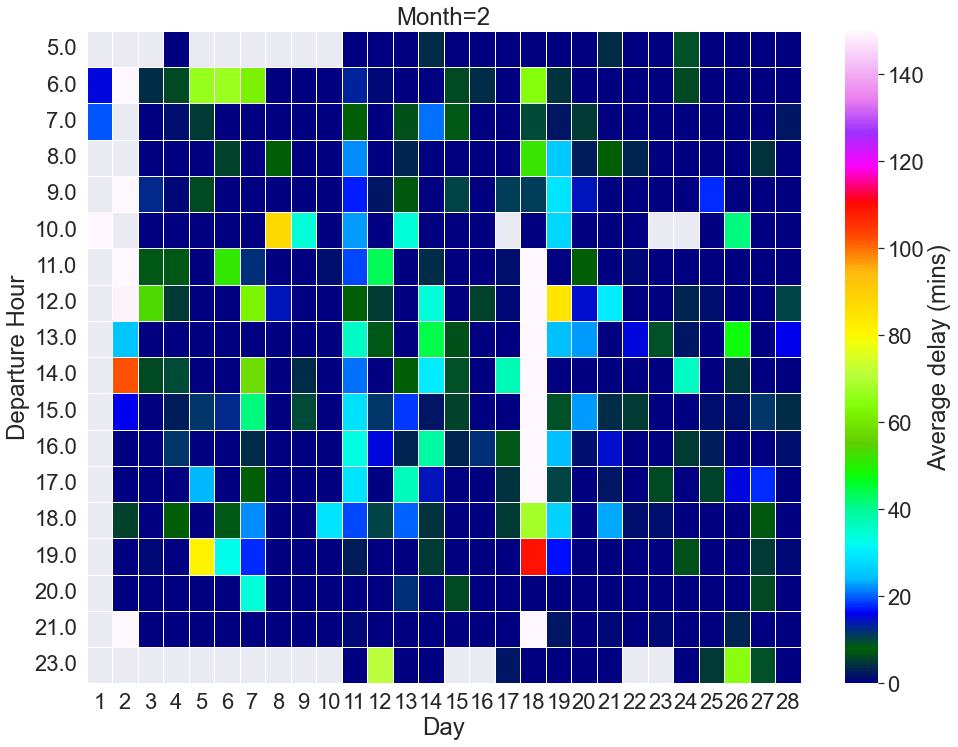

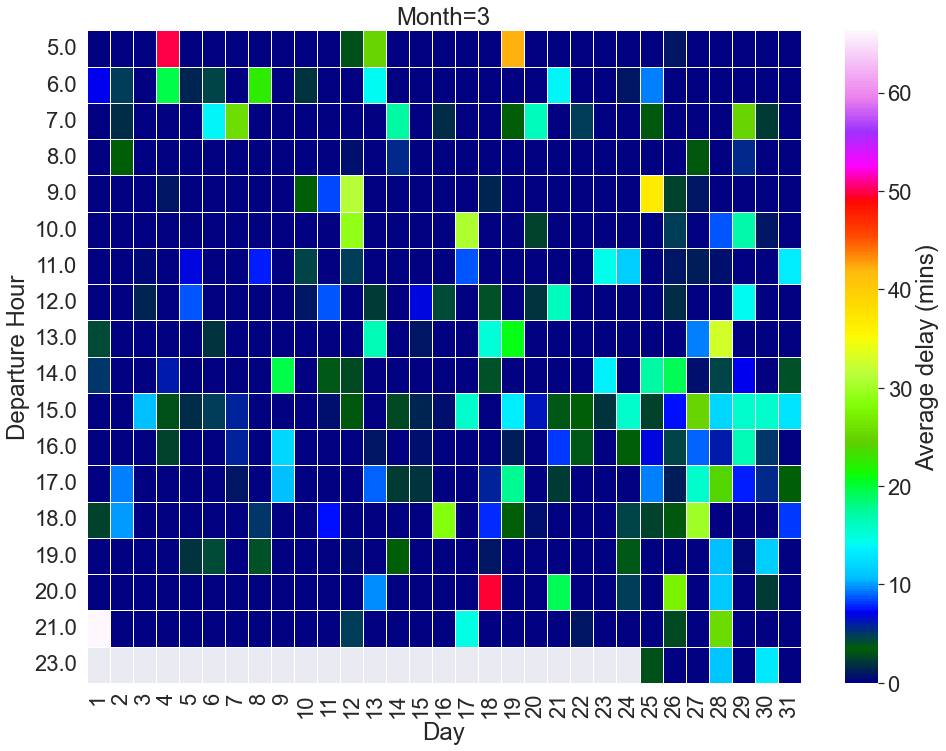

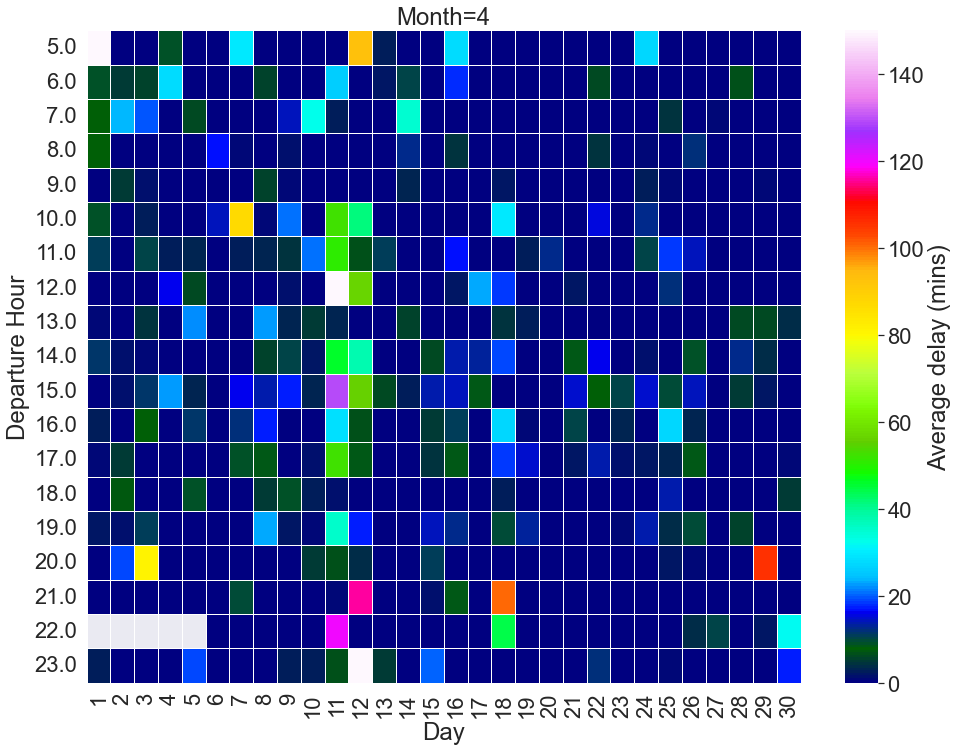

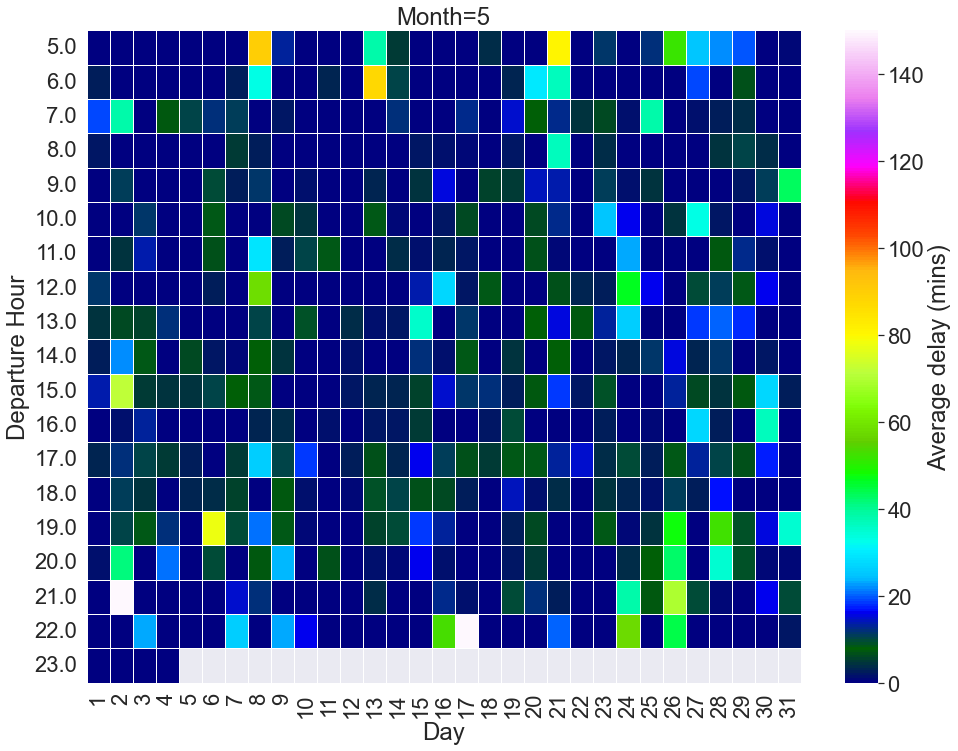

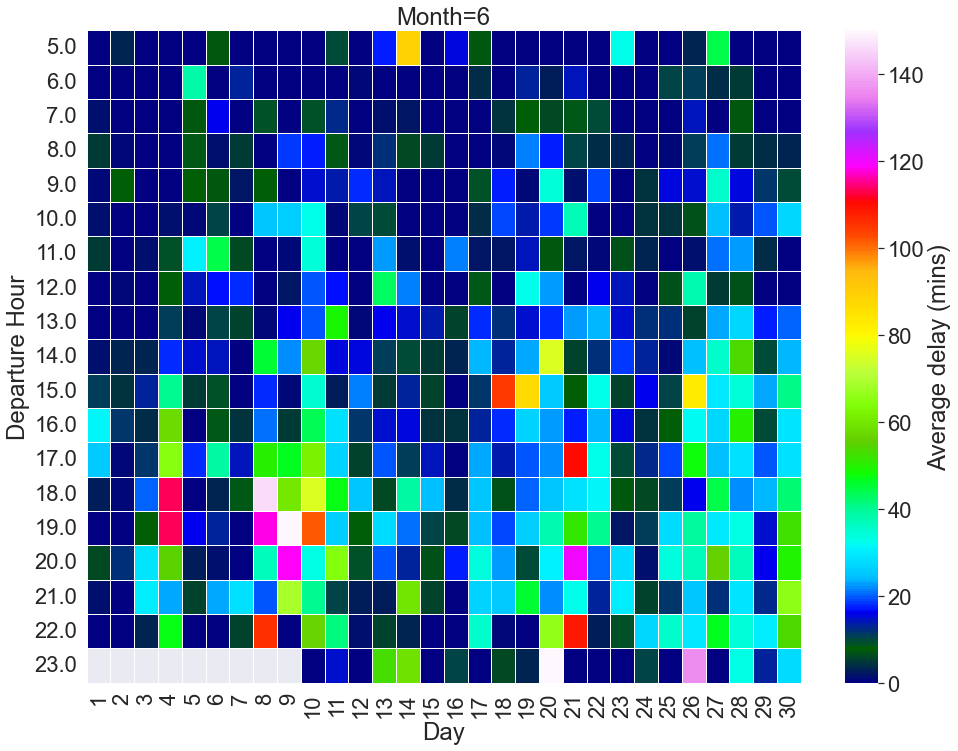

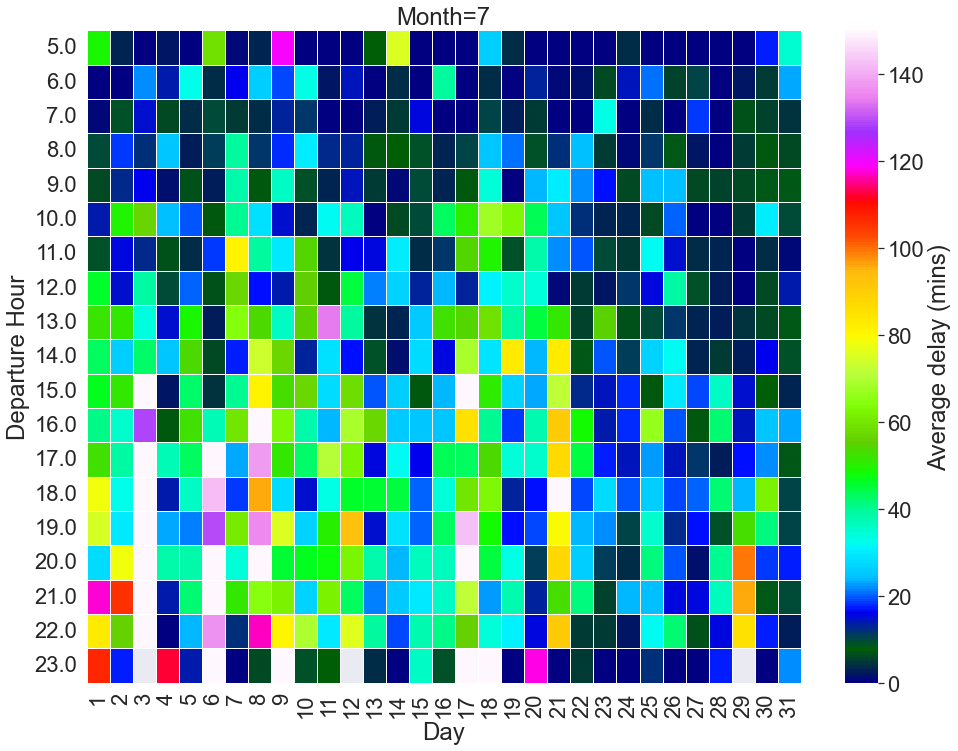

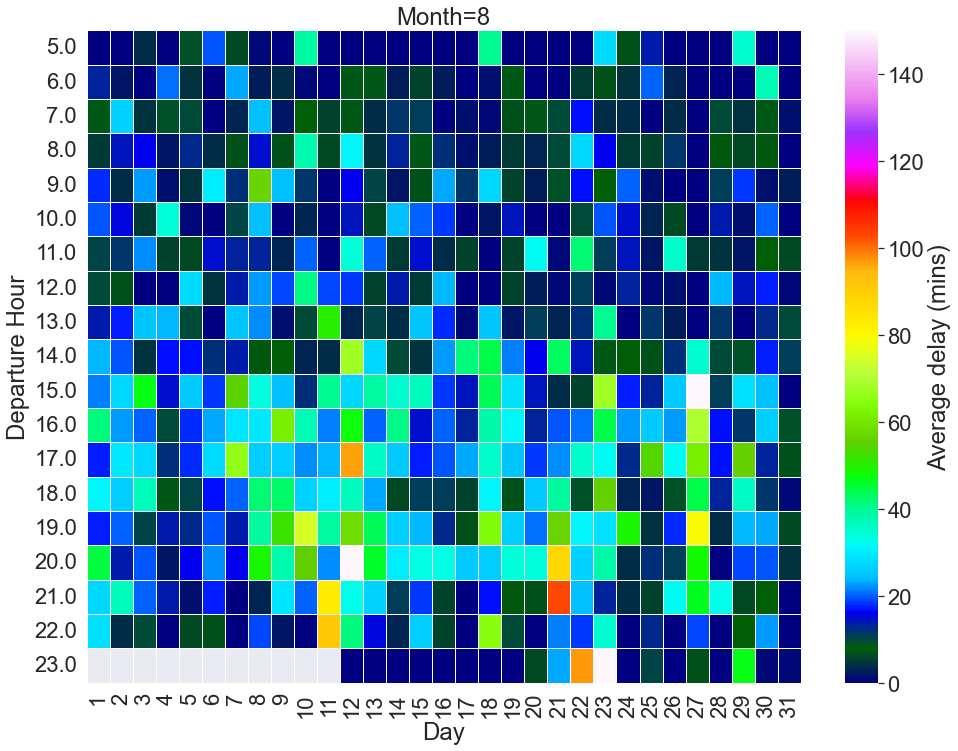

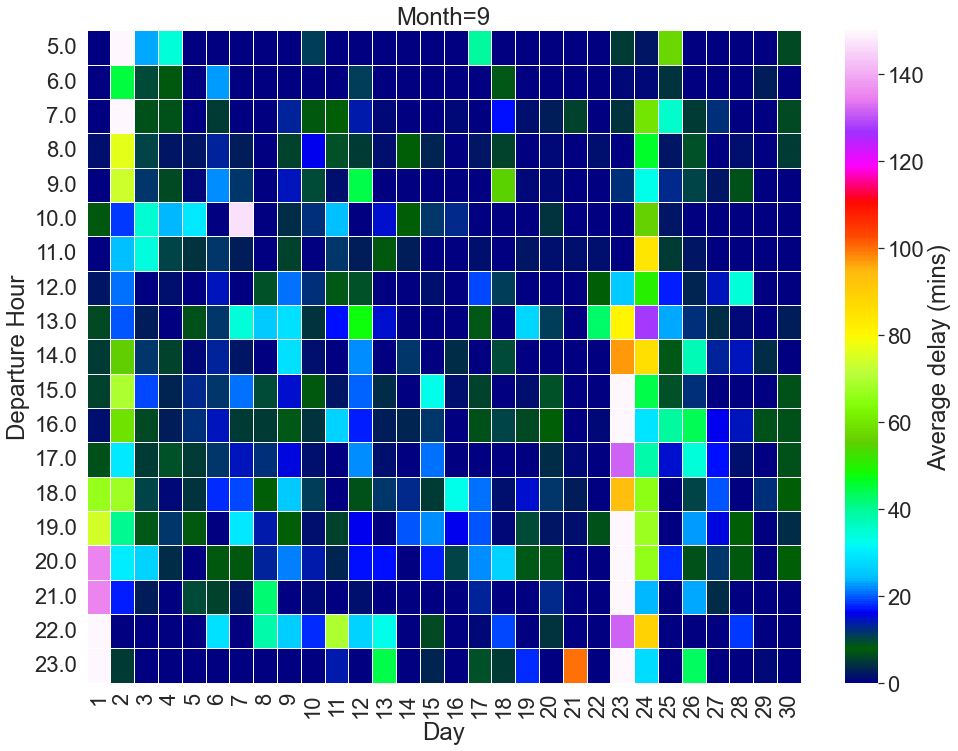

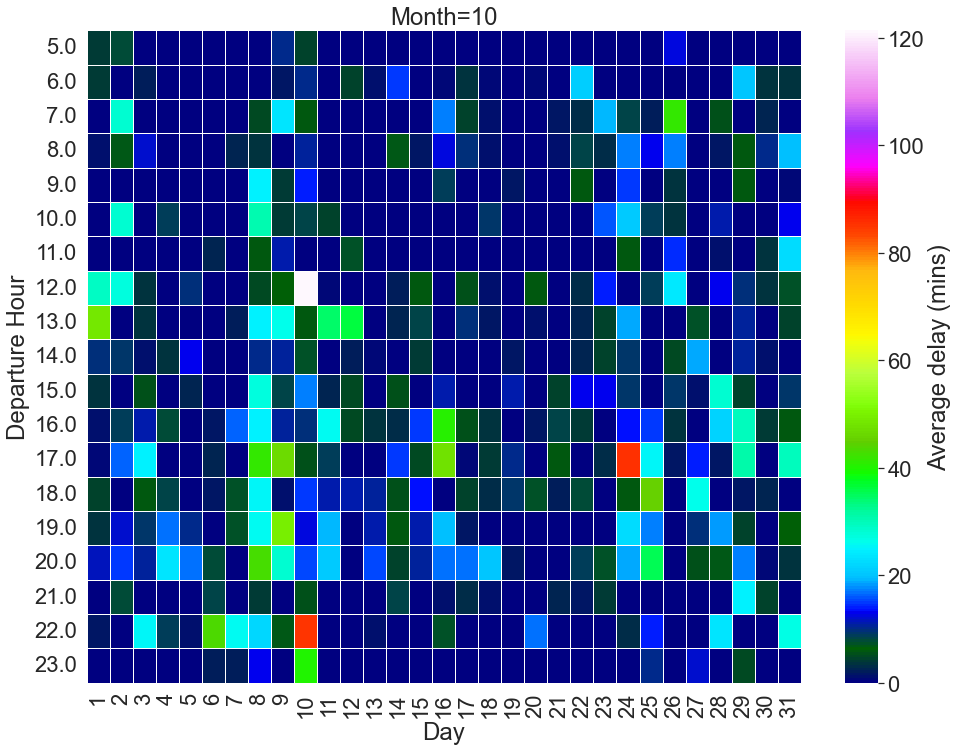

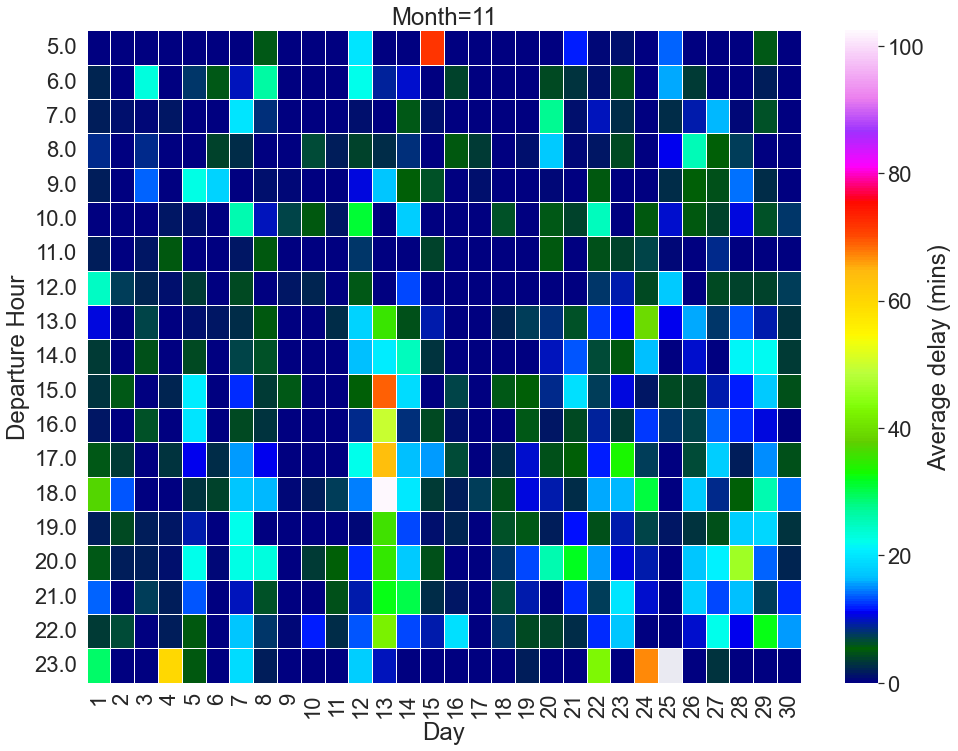

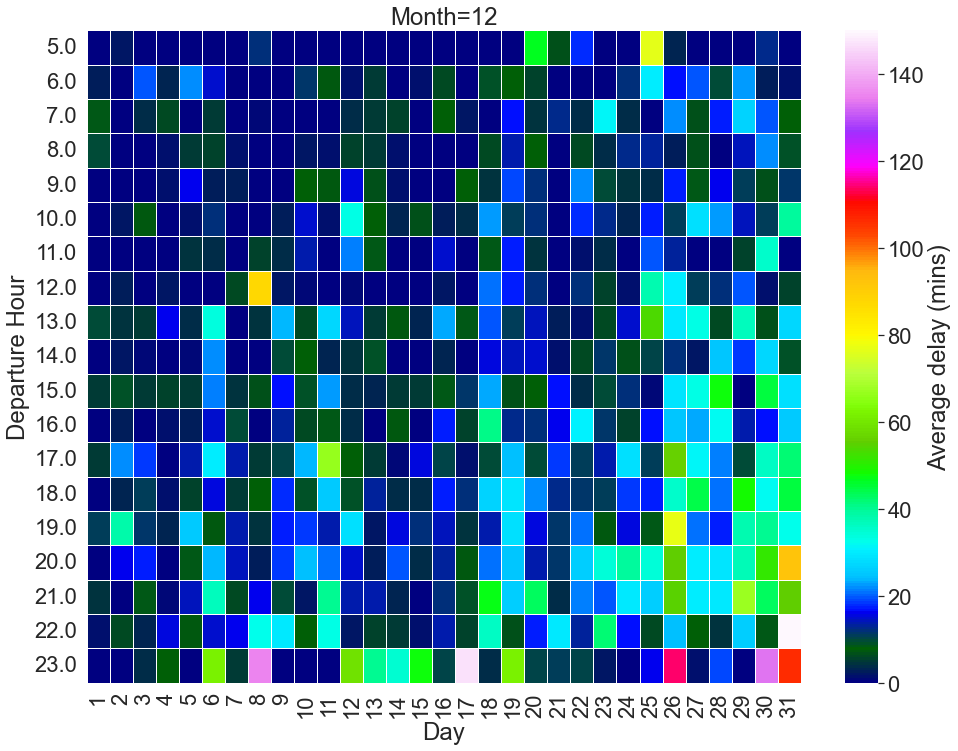

In [42]:
for m in range(1,13):
    cols=['DayOfWeek','DepDelay','Month', 'Hour','Year','Day',"FL_Date"]
    df=JFK_df_sort[cols].copy()

    df=df[df.Year==2021]
    df=df[df.Month==m]

    df["date_hour"]=pd.to_datetime((df.FL_Date.values   + df['Hour'].values))

    df_grouped=df[['DayOfWeek','DepDelay','Month',"Day" ,'Hour','Year',"date_hour"]].groupby("date_hour").mean()
    day=df_grouped.index.day
    hour=df_grouped.Hour
    z=df_grouped.DepDelay
    X, Y = np.meshgrid(hour, day)
    data = pd.DataFrame(data={'x':hour, 'y':day, 'z':z})
    data = data.pivot(index='x', columns='y', values='z')

    plt.figure(figsize=(16,12))
    data[data>=150]=150
    data[data<0]=0
    sns.heatmap(data,cmap='gist_ncar',linewidths=0.75,cbar_kws={'label': 'Average delay (mins)'})#gist_ncar
    plt.xlabel("Day")
    plt.ylabel("Departure Hour")
    plt.title("Month="+str(m))
    plt.savefig('cluster1.png', dpi = 300, bbox_inches='tight')
    plt.show()

- Indeed, the delays have a spatial correlation across both the departure hours and the date. This will be taken into account while modelling.  

# Weather EDA

In [28]:

merged_df=pd.read_csv('/Users/aka/Magnificent Boot Camp/OM/Project/PP_Data/Merged18_22_df.csv')


In [29]:
merged_df.columns

Index(['Actual_Dep_Time', 'Unnamed: 0', 'Unnamed: 0.1', 'Unnamed: 0.1.1',
       'DayOfWeek', 'FL_Date', 'Carrier', 'FL_Num', 'Origin', 'Dest',
       'Scheduled_Dep_Time', 'DepDelay', 'DepartureDelayGroups', 'TaxiOut',
       'Scheduled_Arr_Time', 'Actual_Arr_Time', 'ArrDelay',
       'ArrivalDelayGroups', 'Cancelled', 'CancellationCode', 'Diverted',
       'Estimated_Elapsed_Time', 'Actual_Elapsed_Time', 'Distance',
       'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay',
       'LateAircraftDelay', 'Unnamed: 0.3', 'Unnamed: 0.2', 'Month', 'Hour',
       'Day', 'Year', 'Temperature_F', 'Dew_Point_F', 'Humidity_%', 'Wind',
       'Wind_Speed_mph', 'Wind_Gust_mph', 'Pressure_in', 'Precip_in',
       'Condition'],
      dtype='object')

In [30]:
merged_df.drop(["Unnamed: 0","Unnamed: 0.1", "Unnamed: 0.1.1", 'Unnamed: 0.3', 'Unnamed: 0.2'],axis=1,
               inplace=True)
merged_df= merged_df.drop(['FL_Num', 'DepartureDelayGroups', 'TaxiOut'], axis = 1)
merged_df= merged_df.drop(['Scheduled_Arr_Time', 'Actual_Arr_Time', 'ArrDelay', 'ArrivalDelayGroups'], axis = 1)
merged_df= merged_df.drop(['Cancelled', 'CancellationCode', 'Diverted', 'Estimated_Elapsed_Time', 'Actual_Elapsed_Time'],
                    axis = 1)
#merged_df.head()
#merged_df.describe()
#merged_df.Actual_Dep_Time = pd.to_datetime(merged_df.Actual_Dep_Time)
#merged_df= merged_df.set_index('Actual_Dep_Time')
#merged_df.drop([],axis=1,inplace=True)

In [31]:
merged_df.shape

(619755, 27)

In [32]:
merged_df.head()

,Actual_Dep_Time,DayOfWeek,FL_Date,Carrier,Origin,Dest,Scheduled_Dep_Time,DepDelay,Distance,CarrierDelay,...,Year,Temperature_F,Dew_Point_F,Humidity_%,Wind,Wind_Speed_mph,Wind_Gust_mph,Pressure_in,Precip_in,Condition
0,2018-01-01 00:12:00,1,2018-01-01,B6,JFK,SYR,2018-01-01 22:52:00,80.0,209.0,10.0,...,2018,9.0,-3.0,59.0,NNW,18.0,0.0,30.33,0.0,Fair
1,2018-01-01 02:38:00,1,2018-01-01,B6,JFK,BOS,2018-01-01 22:46:00,232.0,187.0,56.0,...,2018,8.0,-4.0,58.0,NNW,14.0,0.0,30.34,0.0,Fair
2,2018-01-01 05:21:00,1,2018-01-01,B6,JFK,PBI,2018-01-01 05:30:00,-9.0,1028.0,NaN,...,2018,7.0,-5.0,58.0,NW,17.0,0.0,30.34,0.0,Fair
3,2018-01-01 05:42:00,1,2018-01-01,B6,JFK,FLL,2018-01-01 05:45:00,-3.0,1069.0,NaN,...,2018,7.0,-5.0,58.0,NW,16.0,0.0,30.35,0.0,Fair
4,2018-01-01 05:54:00,1,2018-01-01,AA,JFK,PHX,2018-01-01 06:00:00,-6.0,2153.0,NaN,...,2018,7.0,-5.0,58.0,NW,16.0,0.0,30.35,0.0,Fair


## Temperature

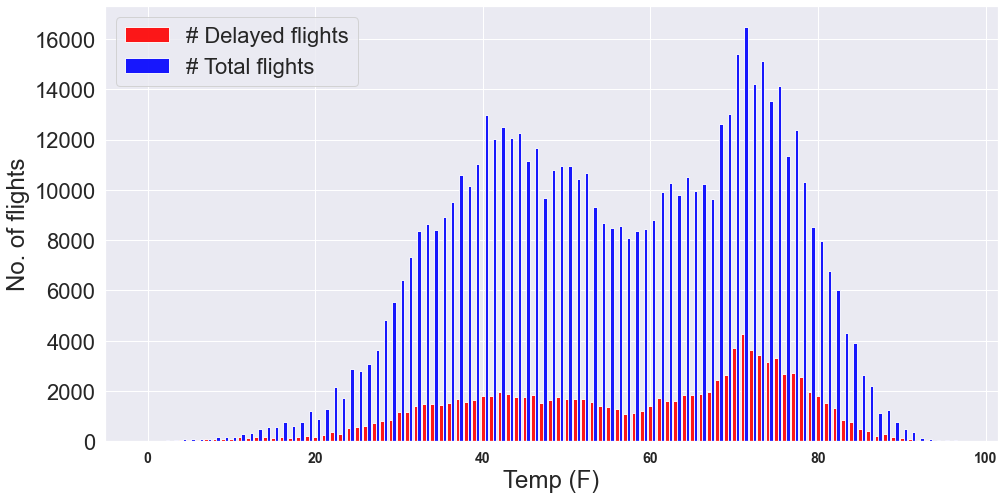

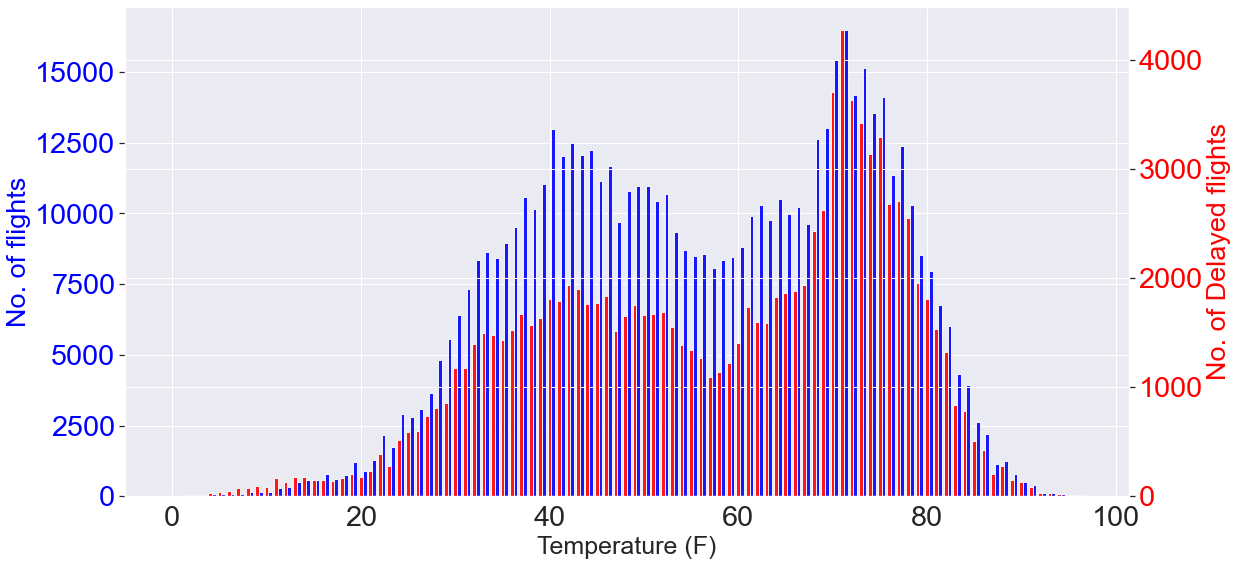

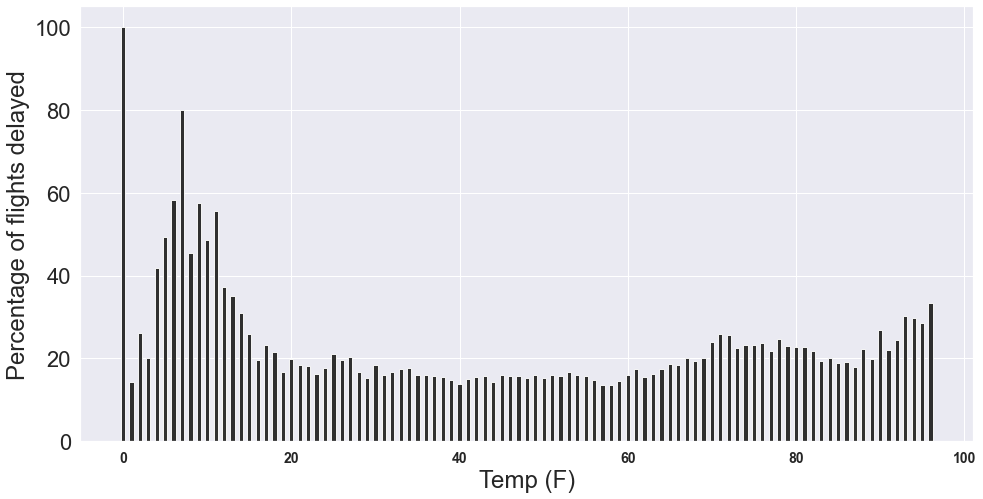

In [33]:
df=merged_df[merged_df['DepDelay']>15]
Delay=df[["DepDelay","Temperature_F"]].groupby("Temperature_F").count()
df=merged_df.copy()
Total_flight_Count=df[["DepDelay","Temperature_F"]].groupby("Temperature_F").count()


plt.figure(figsize=(16,8))
x=np.arange(len(Delay.index))
plt.bar(x,Delay.DepDelay,width=0.5,alpha=0.9,color='red')# color=['red', 'blue', 'magenta', 'green', 'pink'])
plt.bar(x+.4,Total_flight_Count.DepDelay,width=0.4,alpha=0.9,color='blue')
plt.ylabel("No. of flights")
plt.xlabel("Temp (F)")
plt.legend(['# Delayed flights', 
            '# Total flights'])
plt.xticks(ha='center',size=14,fontweight='bold') #rotation=90, 
plt.show()

################
fig, ax1 = plt.subplots(figsize=(18,9))
ax2 = plt.twinx()
x=np.arange(len(Delay.index))
ax2.bar(x,Delay.DepDelay,width=0.4,alpha=0.9,color='red', label = '# Delayed flights')
ax1.bar(x+.4,Total_flight_Count.DepDelay,width=0.4,alpha=0.9,color='blue', label='# Total flights')
ax1.tick_params(axis='x', labelsize = 'large')
ax1.set_xlabel('Temperature (F)', fontsize = 25)
ax1.set_ylabel('No. of flights', color='blue', fontsize = 27)
ax1.tick_params(axis='y', labelcolor='blue', labelsize = 'large')
ax2.set_ylabel('No. of Delayed flights', color='red', fontsize = 27)
ax2.tick_params(axis='y', labelcolor='red', labelsize = 'large')
plt.savefig('temp1.png', dpi = 300, bbox_inches='tight')
plt.show()

################

plt.figure(figsize=(16,8))
x=np.arange(len(Delay.index))
plt.bar(x,Delay.DepDelay/Total_flight_Count.DepDelay*100,width=0.5,alpha=0.9,color='k')# color=['red', 'blue', 'magenta', 'green', 'pink'])
plt.ylabel("Percentage of flights delayed")
plt.xlabel("Temp (F)")
plt.xticks(ha='center',size=14,fontweight='bold') #rotation=90, 
plt.savefig('temp2.png', dpi = 300, bbox_inches='tight')
plt.show()



- Number of flights are less in the colder temperature, thereby yielding less number of delayed flights (but the percetage is higher)

-  On the other hand, both number of flights and delayed flight increase during hot tempreratures. This is due to the fact that air becomes less dense as the temperature increases and the take off becomes problematic as the airplanes would need more fuel and power for the lift off.

## Dew point

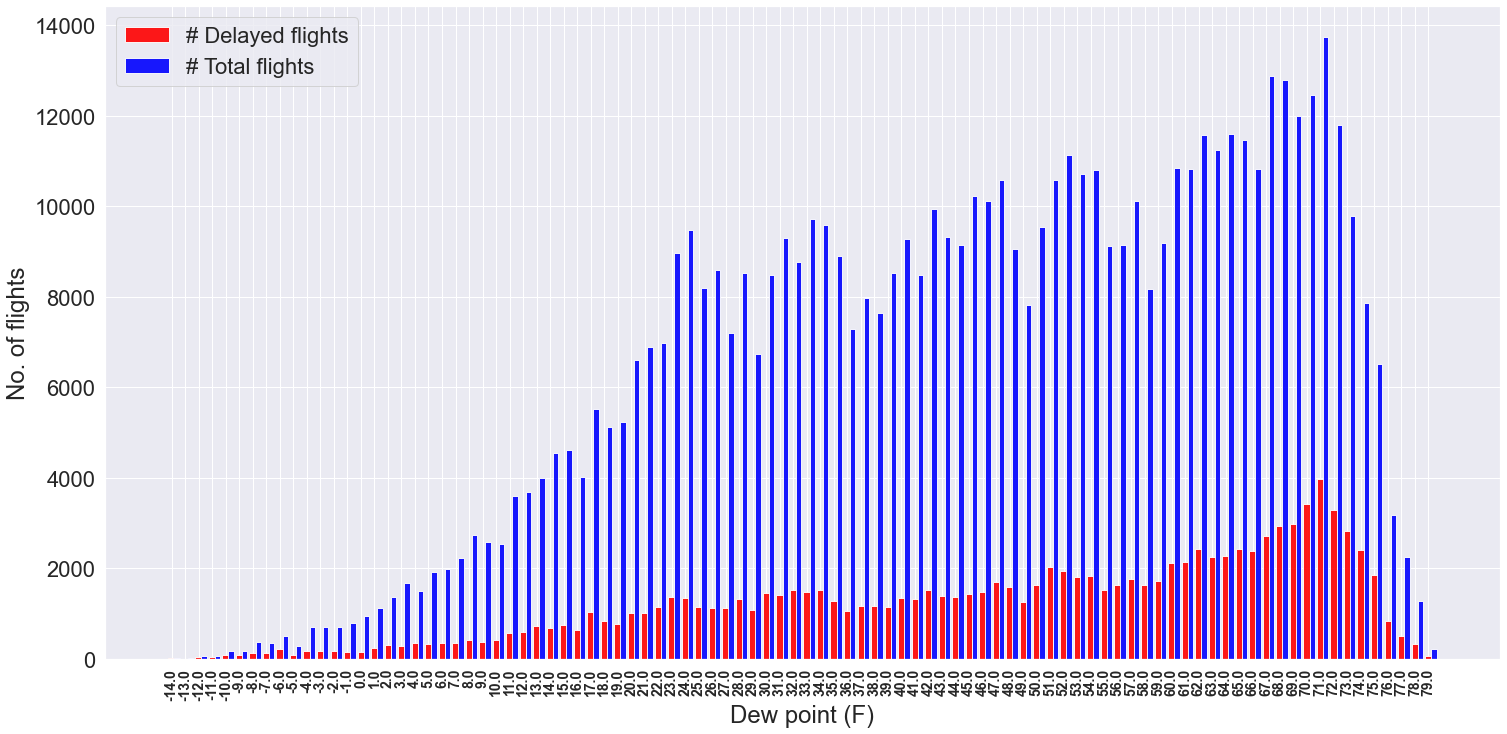

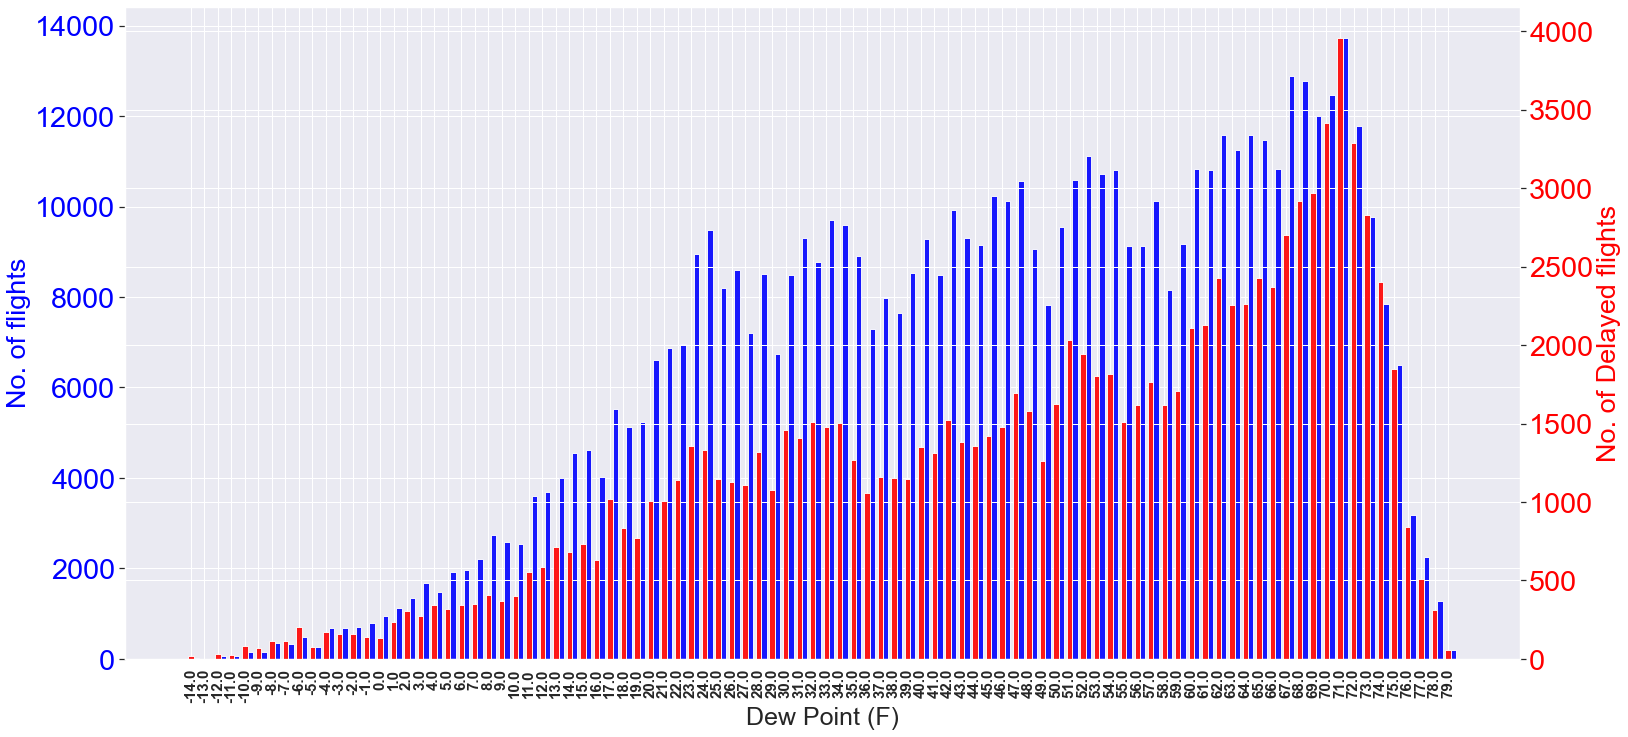

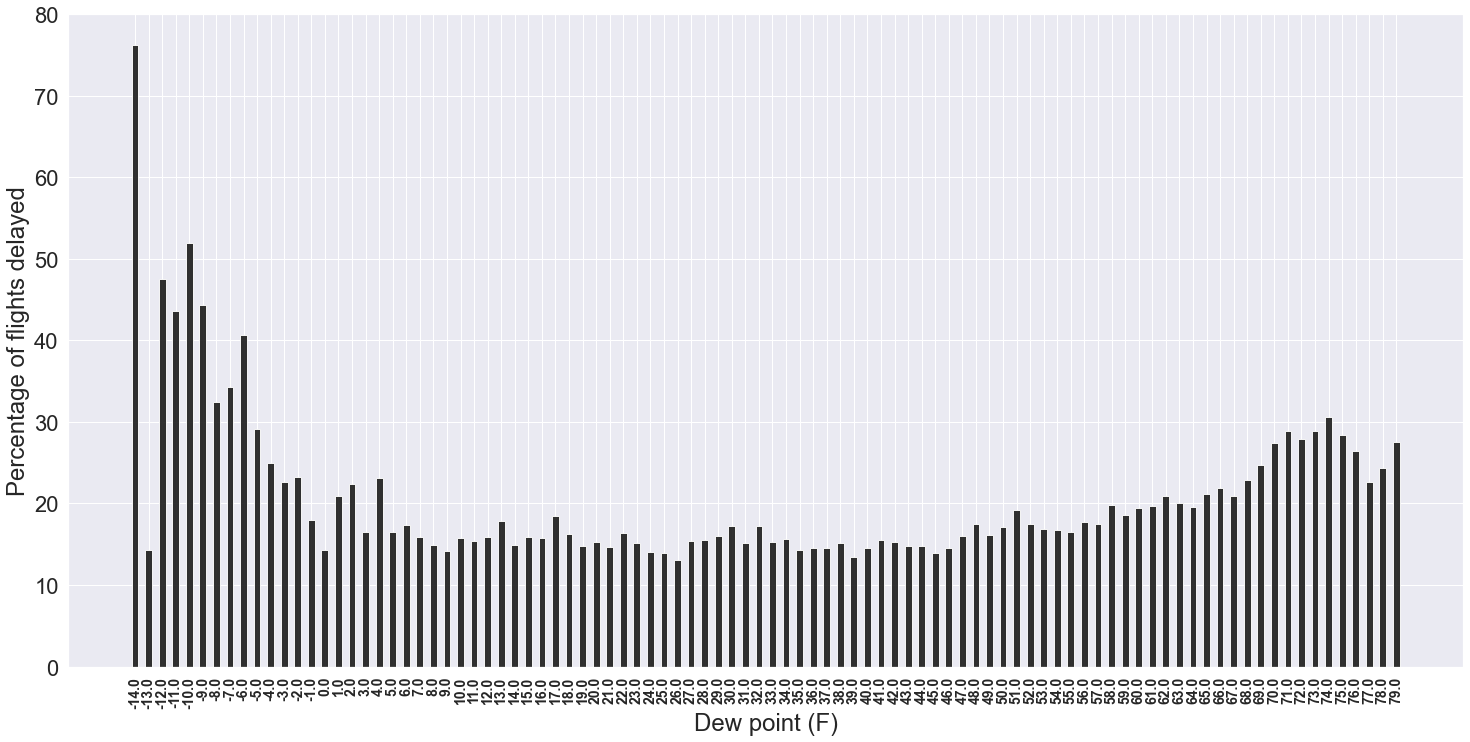

In [34]:
df=merged_df[merged_df['DepDelay']>15]
Delay=df[["DepDelay","Dew_Point_F"]].groupby("Dew_Point_F").count()
df=merged_df.copy()
Total_flight_Count=df[["DepDelay","Dew_Point_F"]].groupby("Dew_Point_F").count()
dew_list = Delay.index.to_list()

plt.figure(figsize=(25,12))
x=np.arange(len(Delay.index))
plt.bar(x,Delay.DepDelay,width=0.5,alpha=0.9,color='red')
plt.bar(x+.4,Total_flight_Count.DepDelay,width=0.4,alpha=0.9,color='blue')
plt.xticks(x,Delay.index)
plt.ylabel("No. of flights")
plt.xlabel("Dew point (F)")
plt.legend(['# Delayed flights', 
            '# Total flights'])
plt.xticks(rotation=90, ha='center',size=14,fontweight='bold')
plt.show()

################
fig, ax1 = plt.subplots(figsize=(25,12))
ax2 = plt.twinx()
x=np.arange(len(Delay.index))
ax2.bar(x,Delay.DepDelay,width=0.4,alpha=0.9,color='red', label = '# Delayed flights')
ax1.bar(x+.4,Total_flight_Count.DepDelay,width=0.4,alpha=0.9,color='blue', label='# Total flights')

ax1.set_xticks(range(0,94))
ax1.set_xticklabels(dew_list, fontsize = 15, weight = 'bold',rotation = 90)
ax1.set_xlabel('Dew Point (F)', fontsize = 25)
ax1.set_ylabel('No. of flights', color='blue', fontsize = 27)
ax1.tick_params(axis='y', labelcolor='blue', labelsize = 'large')
ax2.set_ylabel('No. of Delayed flights', color='red', fontsize = 27)
ax2.tick_params(axis='y', labelcolor='red', labelsize = 'large')
plt.savefig('dew1.png', dpi = 300, bbox_inches='tight')
plt.show()

################


plt.figure(figsize=(25,12))
x=np.arange(len(Delay.index))
plt.bar(x,Delay.DepDelay/Total_flight_Count.DepDelay*100,width=0.5,alpha=0.9,color='k')# color=['red', 'blue', 'magenta', 'green', 'pink'])
plt.ylabel("Percentage of flights delayed")
plt.xlabel("Dew point (F)")
plt.xticks(rotation=90, ha='center',size=14,fontweight='bold')
plt.xticks(x,Delay.index)
plt.savefig('dew2.png', dpi = 300, bbox_inches='tight')
plt.show()


- Comparing the above two plots, it can be derived that at higher dew points, 20-30% of the flight are being delayed. Higher dew point means more humidity (moisture) in the air which can cause a longer takeoff time. Moreover, if the dew point is close to the actual temperature there is chance of foggy weather. 

## Wind Direction

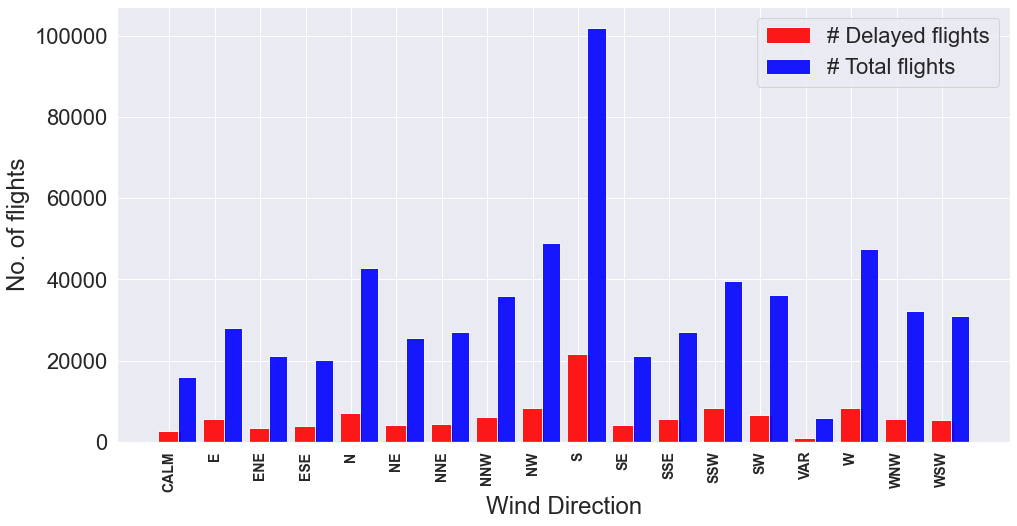

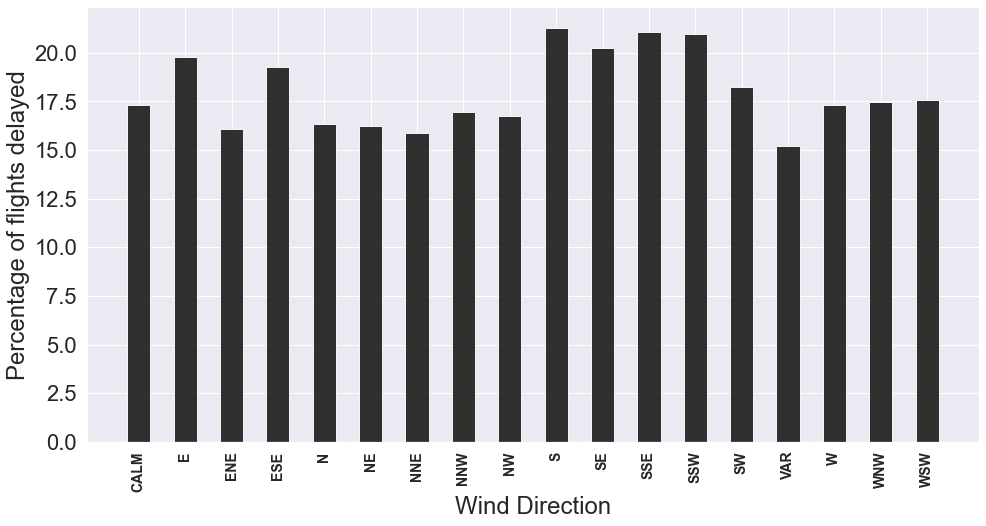

In [35]:
df=merged_df[merged_df['DepDelay']>15]
Delay=df[["DepDelay","Wind"]].groupby("Wind").count()
df=merged_df.copy()
Total_flight_Count=df[["DepDelay","Wind"]].groupby("Wind").count()


plt.figure(figsize=(16,8))
x=np.arange(len(Delay.index))
plt.bar(x,Delay.DepDelay,width=0.5,alpha=0.9,color='red')
plt.bar(x+.4,Total_flight_Count.DepDelay,width=0.4,alpha=0.9,color='blue')
plt.xticks(x,Delay.index)
plt.ylabel("No. of flights")
plt.xlabel("Wind Direction")
plt.legend(['# Delayed flights', 
            '# Total flights'])
plt.xticks(rotation=90, ha='center',size=14,fontweight='bold')
plt.show()


plt.figure(figsize=(16,8))
x=np.arange(len(Delay.index))
plt.bar(x,Delay.DepDelay/Total_flight_Count.DepDelay*100,width=0.5,alpha=0.9,color='k')
plt.ylabel("Percentage of flights delayed")
plt.xlabel("Wind Direction")
plt.xticks(rotation=90, ha='center',size=14,fontweight='bold')
plt.xticks(x,Delay.index)
plt.show()



- It seems to be a fairly even distribution. Although south winds seems to show a higher percentage of flights delayed


## Wind Speed

In [36]:
def df_binning(xy_data, L,H,step):
    binarray=np.arange(L,H,step)
    [x,y]=xy_data
    x_bin_array=binarray
    y_bin_array=[]
    
    j=0
    for i in range (len(binarray)-1):
       
            y_bin_array.append(np.sum(y[np.where((x>=binarray[i]) & (x<binarray[i+1]))]))
            cc=0
            
    df = pd.DataFrame([x_bin_array,y_bin_array]).transpose()
    df.columns=["X","Y"]
    return df


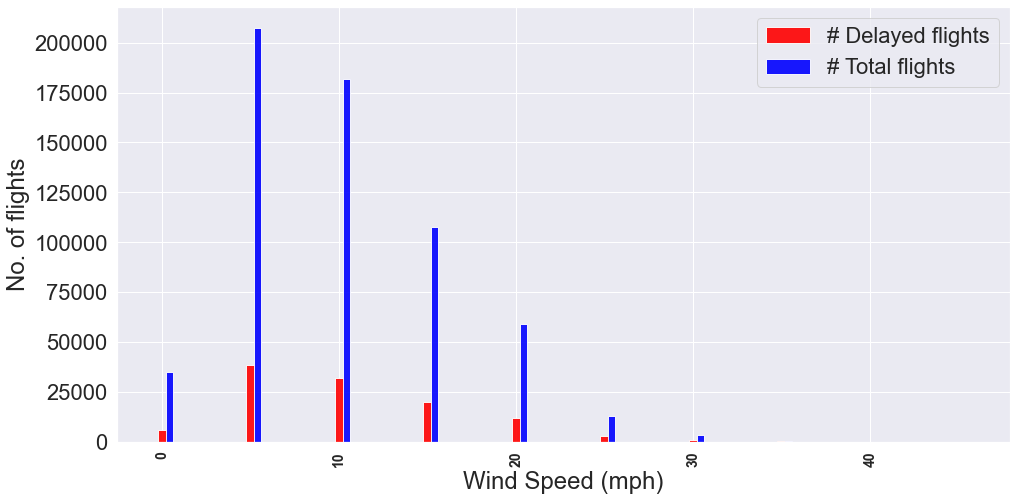

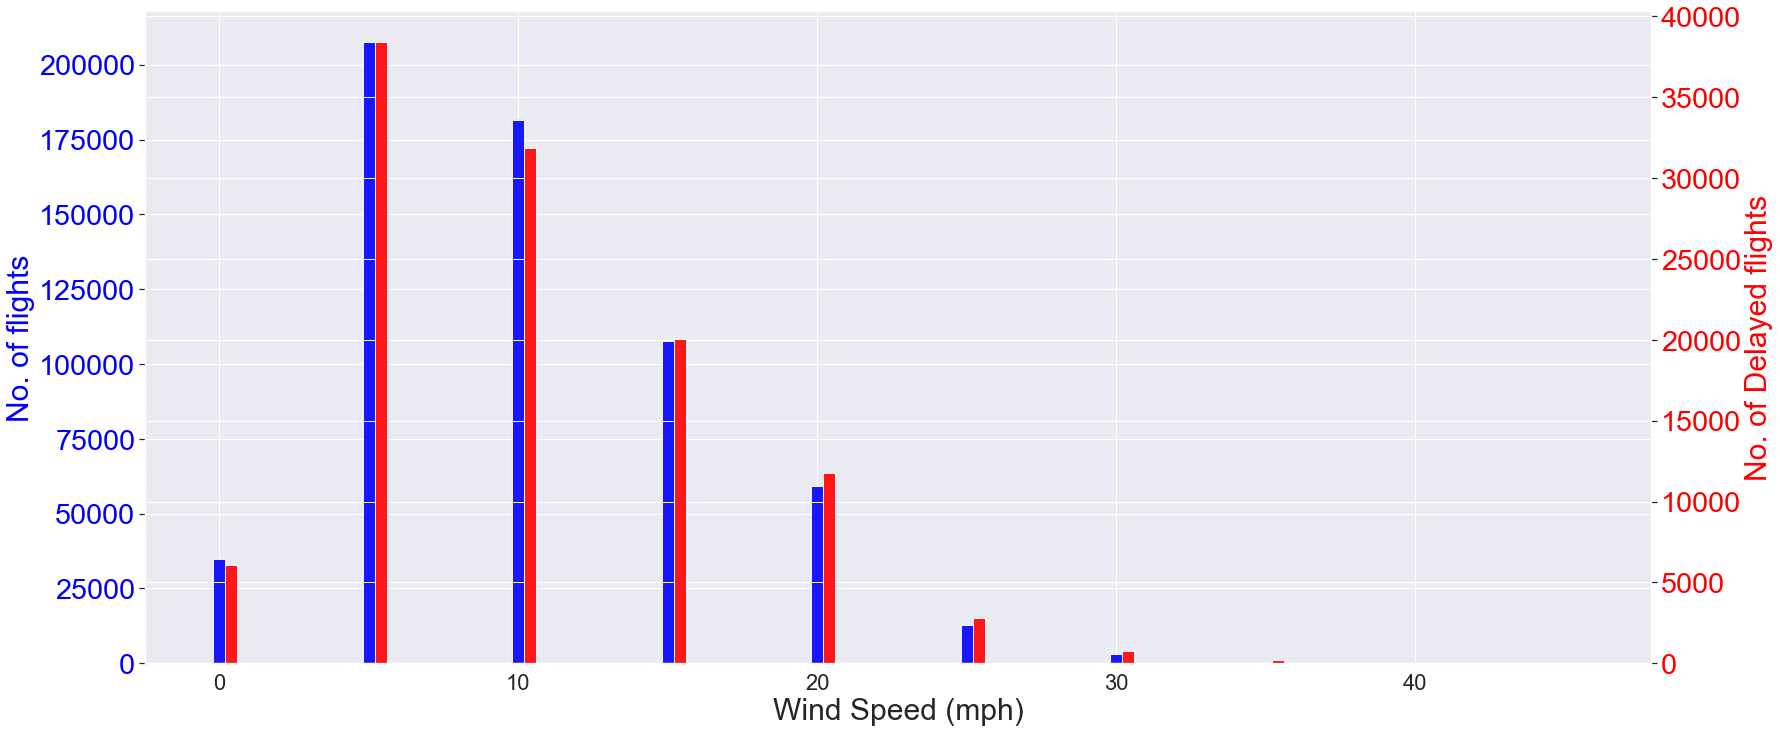

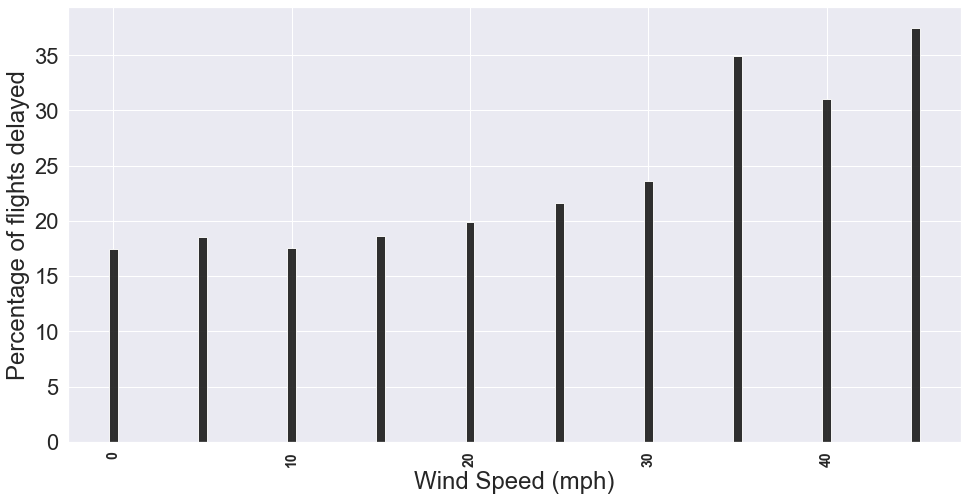

In [37]:

df=merged_df[merged_df['DepDelay']>15]
Delay=df[["DepDelay","Wind_Speed_mph"]].groupby("Wind_Speed_mph").count()
df=merged_df.copy()
Total_flight_Count=df[["DepDelay","Wind_Speed_mph"]].groupby("Wind_Speed_mph").count()

Delay=df_binning([Delay.index,Delay.DepDelay.values], 0,51,5)
Total_flight_Count=df_binning([Total_flight_Count.index,Total_flight_Count.DepDelay.values],  0,51,5)

plt.figure(figsize=(16,8))
plt.bar(Delay.X,Delay.Y,width=0.5,alpha=0.9,color='red')

plt.bar(Total_flight_Count.X+.4,Total_flight_Count.Y,width=0.4,alpha=0.9,color='blue')
plt.ylabel("No. of flights")
plt.xlabel("Wind Speed (mph)")
plt.legend(['# Delayed flights', 
            '# Total flights'])
plt.xticks(rotation=90, ha='center',size=14,fontweight='bold')
plt.show()

######
fig, ax1 = plt.subplots(figsize=(27,12))
ax2 = plt.twinx()
ax1.bar(Total_flight_Count.X,Total_flight_Count.Y, width=0.4,alpha=0.9,color='blue')
ax2.bar(Delay.X +.4, Delay.Y,width=0.4,alpha=0.9,color='red')
ax1.set_xlabel('Wind Speed (mph)', fontsize = 30)
ax1.set_ylabel('No. of flights', color='blue', fontsize = 30)
ax1.tick_params(axis='y', labelcolor='blue', labelsize = 'large')

ax2.set_ylabel('No. of Delayed flights', color='red', fontsize = 30)
ax2.tick_params(axis='y', labelcolor='red', labelsize = 'large')
plt.show()

#######
plt.figure(figsize=(16,8))
x=np.arange(len(Delay.index))
plt.bar(Delay.X,Delay.Y/Total_flight_Count.Y*100,width=0.5,alpha=0.9,color='k')
plt.ylabel("Percentage of flights delayed")
plt.xlabel("Wind Speed (mph)")
plt.xticks(rotation=90, ha='center',size=14,fontweight='bold')
plt.show()



## Wind Gust

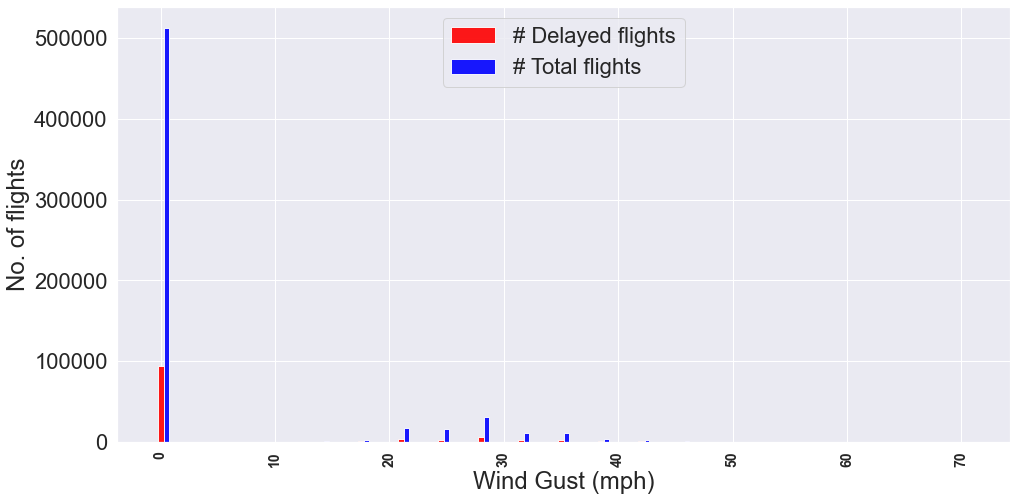

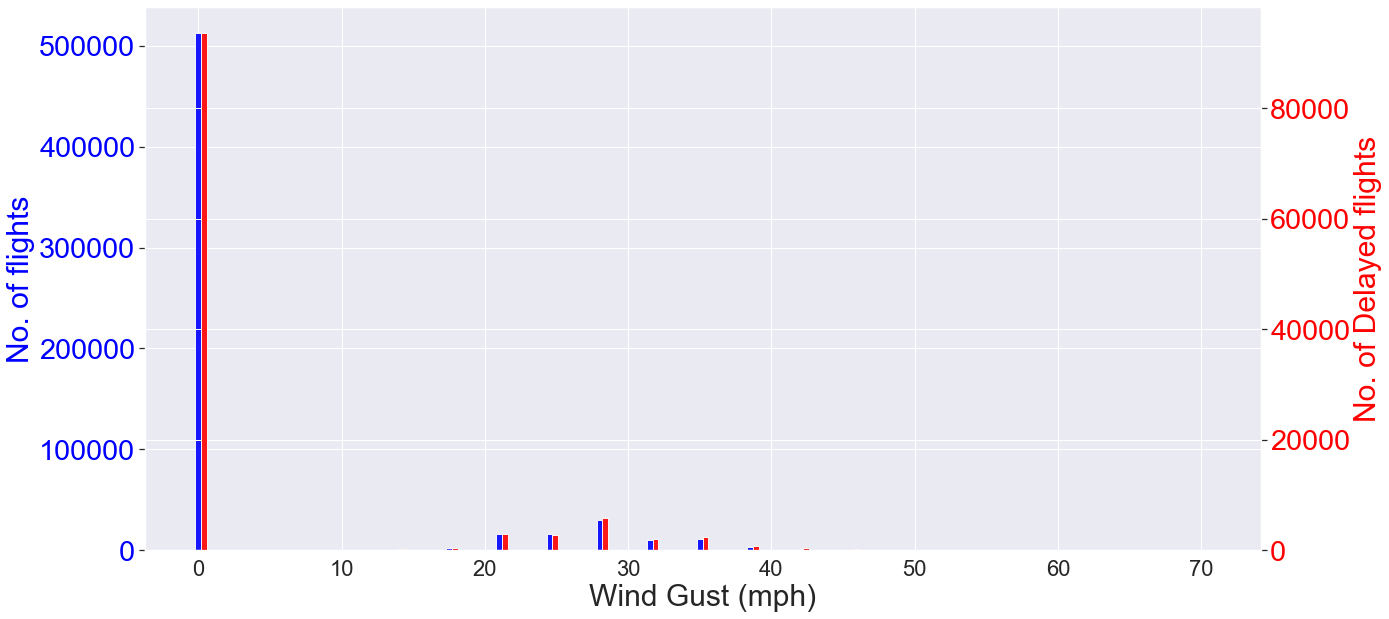

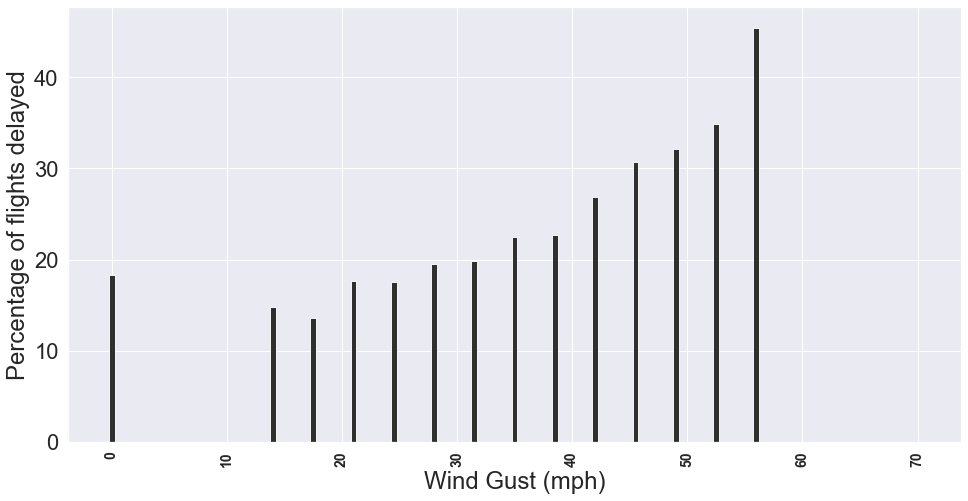

In [38]:

df=merged_df[merged_df['DepDelay']>15]
Delay=df[["DepDelay","Wind_Gust_mph"]].groupby("Wind_Gust_mph").count()
df=merged_df.copy()
Total_flight_Count=df[["DepDelay","Wind_Gust_mph"]].groupby("Wind_Gust_mph").count()
low=min(Total_flight_Count.index)
high=max(Total_flight_Count.index)
Delay=df_binning([Delay.index,Delay.DepDelay.values], low,high*1.1,(high-low)/20)
Total_flight_Count=df_binning([Total_flight_Count.index,Total_flight_Count.DepDelay.values],low,high*1.1,(high-low)/20)

plt.figure(figsize=(16,8))
# x=np.arange(len(Delay.index))
plt.bar(Delay.X,Delay.Y,width=0.5,alpha=0.9,color='red')# color=['red', 'blue', 'magenta', 'green', 'pink'])

plt.bar(Total_flight_Count.X+.5,Total_flight_Count.Y,width=0.4,alpha=0.9,color='blue')
# plt.xticks(x,Delay.index)
plt.ylabel("No. of flights")
plt.xlabel("Wind Gust (mph)")
plt.legend(['# Delayed flights', 
            '# Total flights'])
plt.xticks(rotation=90, ha='center',size=14,fontweight='bold')
plt.show()

######
fig, ax1 = plt.subplots(figsize=(20,10))
ax2 = plt.twinx()
ax1.bar(Total_flight_Count.X,Total_flight_Count.Y, width=0.4,alpha=0.9,color='blue')
ax2.bar(Delay.X +.4, Delay.Y,width=0.4,alpha=0.9,color='red')
ax1.set_xlabel('Wind Gust (mph)', fontsize = 30)
ax1.set_ylabel('No. of flights', color='blue', fontsize = 30)
ax1.tick_params(axis='y', labelcolor='blue', labelsize = 'large')

ax2.set_ylabel('No. of Delayed flights', color='red', fontsize = 30)
ax2.tick_params(axis='y', labelcolor='red', labelsize = 'large')
plt.show()

#######

plt.figure(figsize=(16,8))
x=np.arange(len(Delay.index))
plt.bar(Delay.X,Delay.Y/Total_flight_Count.Y*100,width=0.5,alpha=0.9,color='k')# color=['red', 'blue', 'magenta', 'green', 'pink'])
plt.ylabel("Percentage of flights delayed")
plt.xlabel("Wind Gust (mph)")
plt.xticks(rotation=90, ha='center',size=14,fontweight='bold')
plt.show()


## Precipitation

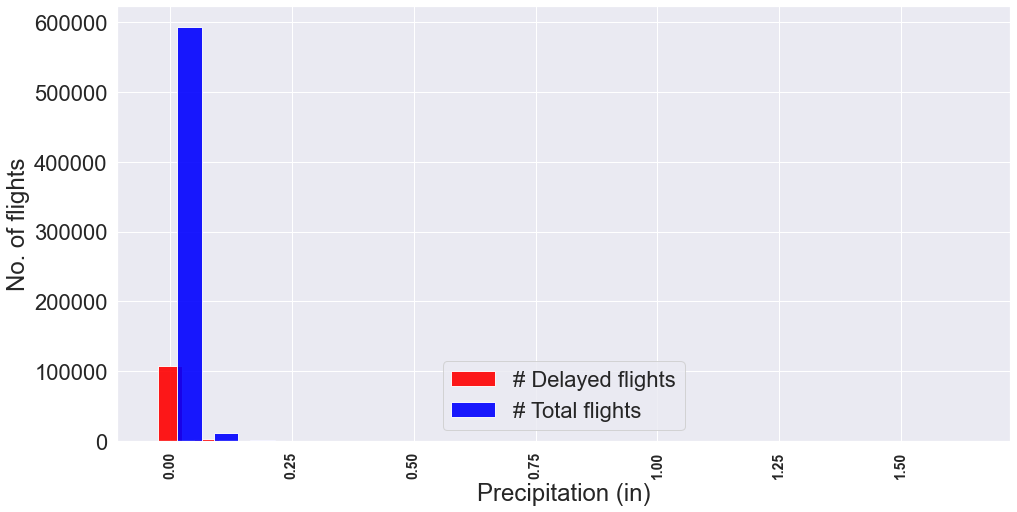

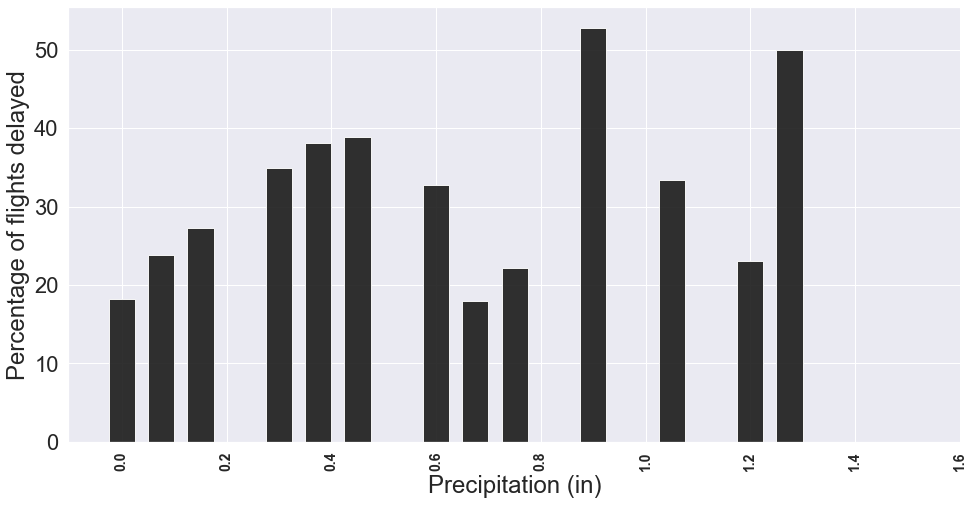

In [39]:

df=merged_df[merged_df['DepDelay']>15]
Delay=df[["DepDelay","Precip_in"]].groupby("Precip_in").count()
df=merged_df.copy()
Total_flight_Count=df[["DepDelay","Precip_in"]].groupby("Precip_in").count()

low=min(Total_flight_Count.index)
high=max(Total_flight_Count.index)
Delay=df_binning([Delay.index,Delay.DepDelay.values], low,high*1.1,(high-low)/20)
Total_flight_Count=df_binning([Total_flight_Count.index,Total_flight_Count.DepDelay.values],low,high*1.1,(high-low)/20)

plt.figure(figsize=(16,8))
# x=np.arange(len(Delay.index))
plt.bar(Delay.X,Delay.Y,width=0.05,alpha=0.9,color='red')

plt.bar(Total_flight_Count.X+0.04,Total_flight_Count.Y,width=0.05,alpha=0.9,color='blue')
plt.ylabel("No. of flights")
plt.xlabel("Precipitation (in)")
plt.legend(['# Delayed flights', 
            '# Total flights'])
plt.xticks(rotation=90, ha='center',size=14,fontweight='bold')
plt.show()



plt.figure(figsize=(16,8))
x=np.arange(len(Delay.index))
plt.bar(Delay.X,Delay.Y/Total_flight_Count.Y*100,width=0.05,alpha=0.9,color='k')
plt.ylabel("Percentage of flights delayed")
plt.xlabel("Precipitation (in)")
plt.xticks(rotation=90, ha='center',size=14,fontweight='bold')
plt.show()


## Condition

In [40]:
len(pd.unique(merged_df['Condition']))

51

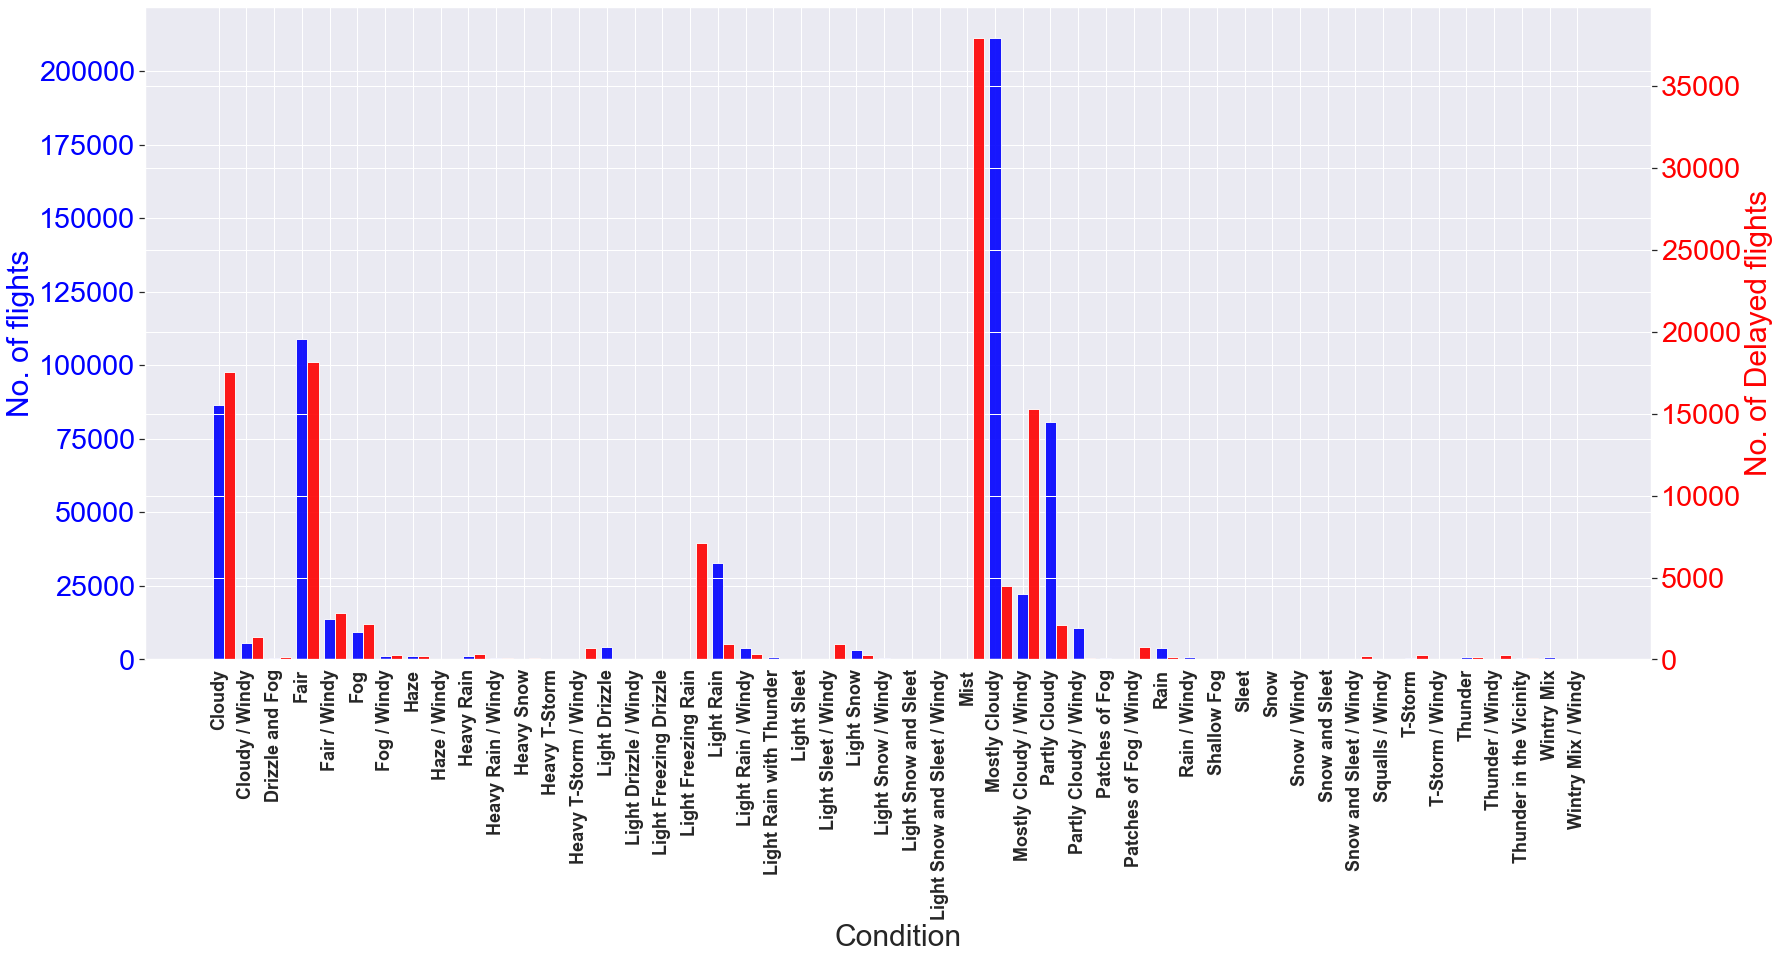

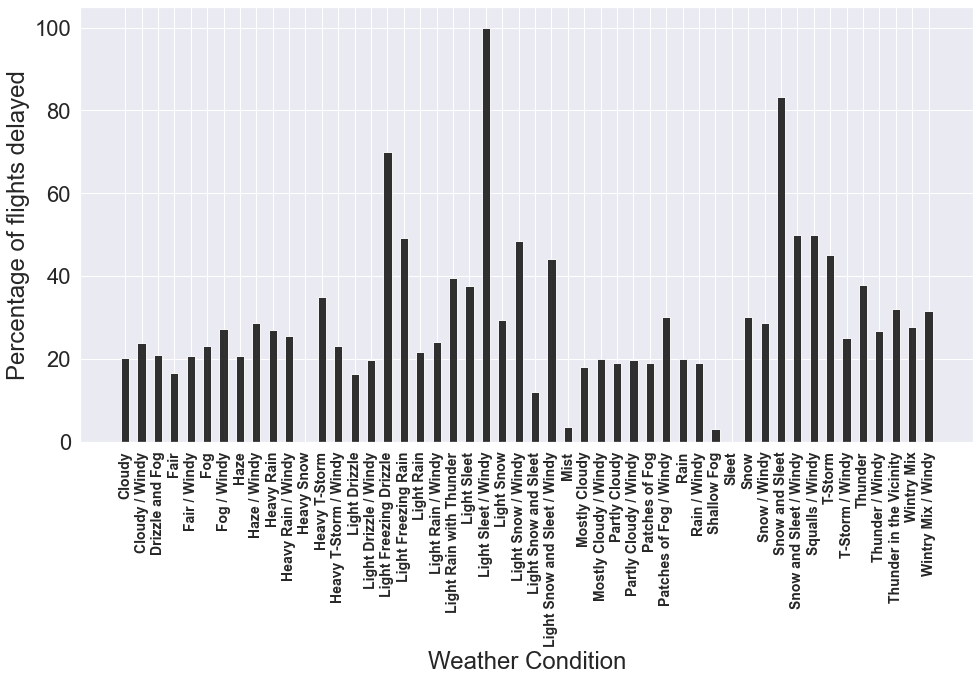

In [41]:
df=merged_df[merged_df['DepDelay']>=15]
Delay=df[["DepDelay","Condition"]].groupby("Condition").count()
df=merged_df.copy()
Total_flight_Count=df[["DepDelay","Condition"]].groupby("Condition").count()


cond_list2 = Total_flight_Count.index.to_list()
######
fig, ax1 = plt.subplots(figsize=(27,12))
ax2 = plt.twinx()
x=np.arange(len(Total_flight_Count.index))
ax1.bar(x,Total_flight_Count.DepDelay,width=0.4,alpha=0.9,color='blue')
z=np.arange(len(Delay.index))
ax2.bar(z+.4,Delay.DepDelay,width=0.4,alpha=0.9,color='red')


ax1.set_xticks(range(0,50))
ax1.set_xticklabels(cond_list2, fontsize = 18, weight = 'bold',rotation = 90)
ax1.set_xlabel('Condition', fontsize = 30)
ax1.set_ylabel('No. of flights', color='blue', fontsize = 30)
ax1.tick_params(axis='y', labelcolor='blue', labelsize = 'large')

ax2.set_ylabel('No. of Delayed flights', color='red', fontsize = 30)
ax2.tick_params(axis='y', labelcolor='red', labelsize = 'large')
plt.show()
#####


plt.figure(figsize=(16,8))
x=np.arange(len((Delay.DepDelay/Total_flight_Count.DepDelay).index))
plt.bar(x,Delay.DepDelay/Total_flight_Count.DepDelay*100,width=0.5,alpha=0.9,color='k')
plt.ylabel("Percentage of flights delayed")
plt.xlabel("Weather Condition")
plt.xticks(rotation=90, ha='center',size=14,fontweight='bold')
plt.xticks(x,(Delay.DepDelay/Total_flight_Count.DepDelay).index)
# plt.legend(['Percentage of delayed flight for a given carrier' ])
plt.show()
